numba: 0.54.1
numpy: 1.20.3
pandas: 1.3.4
ccxt: 2.4.18


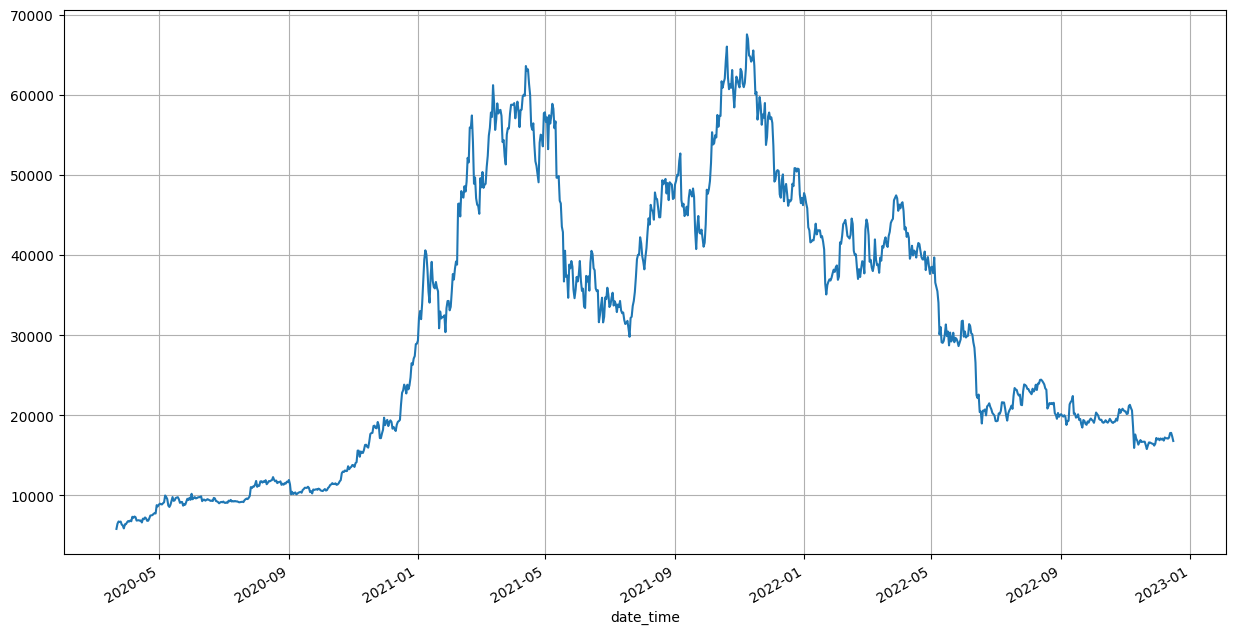

In [1]:
import ccxt
import pprint
import datetime
import numba
import numpy
import pandas as pd

print("numba:", numba.__version__)
print("numpy:", numpy.__version__)
print("pandas:", pd.__version__)
print("ccxt:", ccxt.__version__)

# From timestamp to Datetime
def convert_from_ms(value):
    return datetime.datetime.fromtimestamp(value)

exchange = ccxt.binance()
markets= exchange.load_markets()

symbol='BTC/USDT'

ohlcv=exchange.fetch_ohlcv(symbol,'1d', limit=2500)
if len(ohlcv):
    df = pd.DataFrame(ohlcv, columns=['timestamp','open','high','low','close','volume'])
    df['date_time']=(df['timestamp']/1000).apply(convert_from_ms)
    df.index = df['date_time']
    df.drop('date_time', axis=1, inplace=True)
    df.drop('timestamp', axis=1, inplace=True)
    df.dropna()
    df.close.plot(figsize = [15,8]).grid()
else:
    print("NO DATA RECEIVED")


In [2]:
%run ./engine_gandalf_wintermute.py

In [3]:
%run ./functions_gandalf_wintermute.py

5.11.0


In [4]:
df['high_media']=df.high.rolling(3).mean()
df['low_media']=df.low.rolling(3).mean()
period_sma=7
df["daily_close_sma"] = df.close.rolling(period_sma).mean()



Elaboration starting at: 2022-12-16 19:55:11.136413
Elaboration completed at: 2022-12-16 19:55:11.137816 in 0:00:00.001403

Consistency check: entries: 31 exits: 31

*****************************************************************************************
*** Performance Report - by Gandalf Project R&D - Version Wintermute - Copyright 2022 ***
*****************************************************************************************

CAGR:                     11.72 (capital = 10000)
Annual Return:            13.15 (capital = 10000)

Calmar Ratio:             2.16 (yearly)
Sharpe Ratio:             1.36 (initial capital = 10000, risk free rate = 0.0)
Sortino Ratio:            0.19 (initial capital = 10000, risk free rate = 0.0)
Omega Ratio:              1.15 (threshold = 100)
Kestner Ratio:            0.31

Operations:               31

Profit:                   3944.68
Average Trade:            127.25

Profit Factor:            1.8
Gross Profit:             8861.39
Gross Loss:         

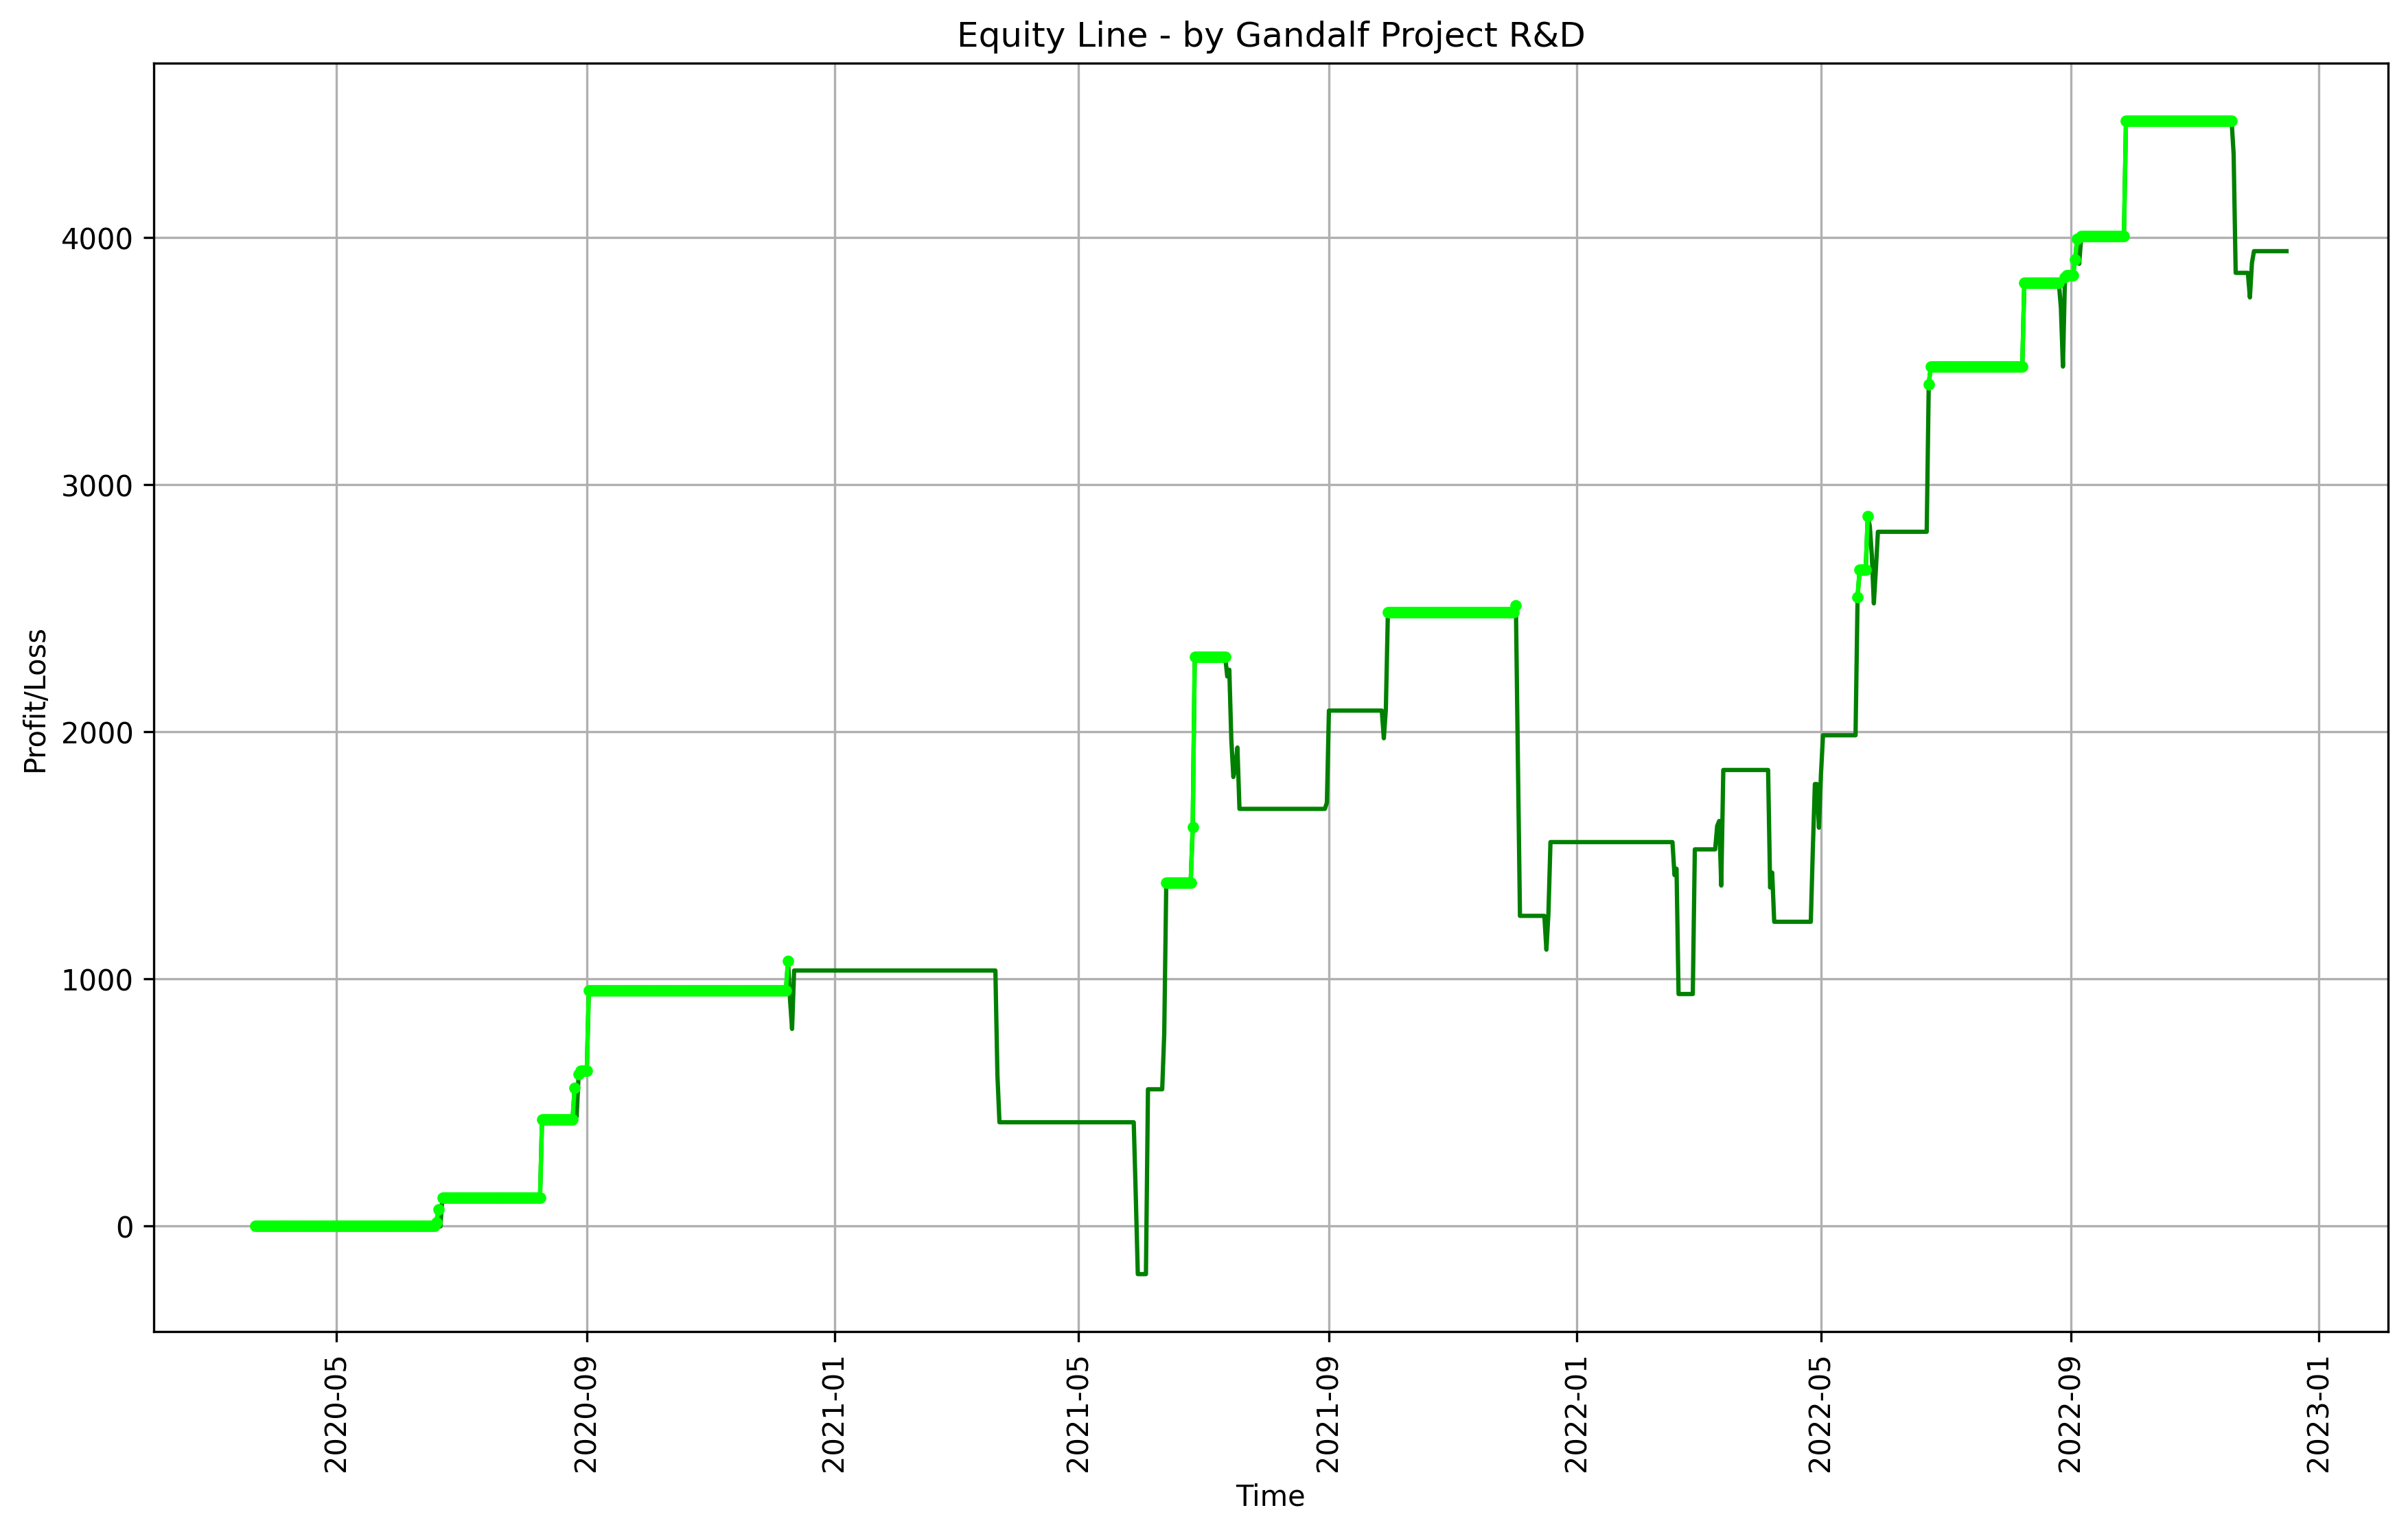

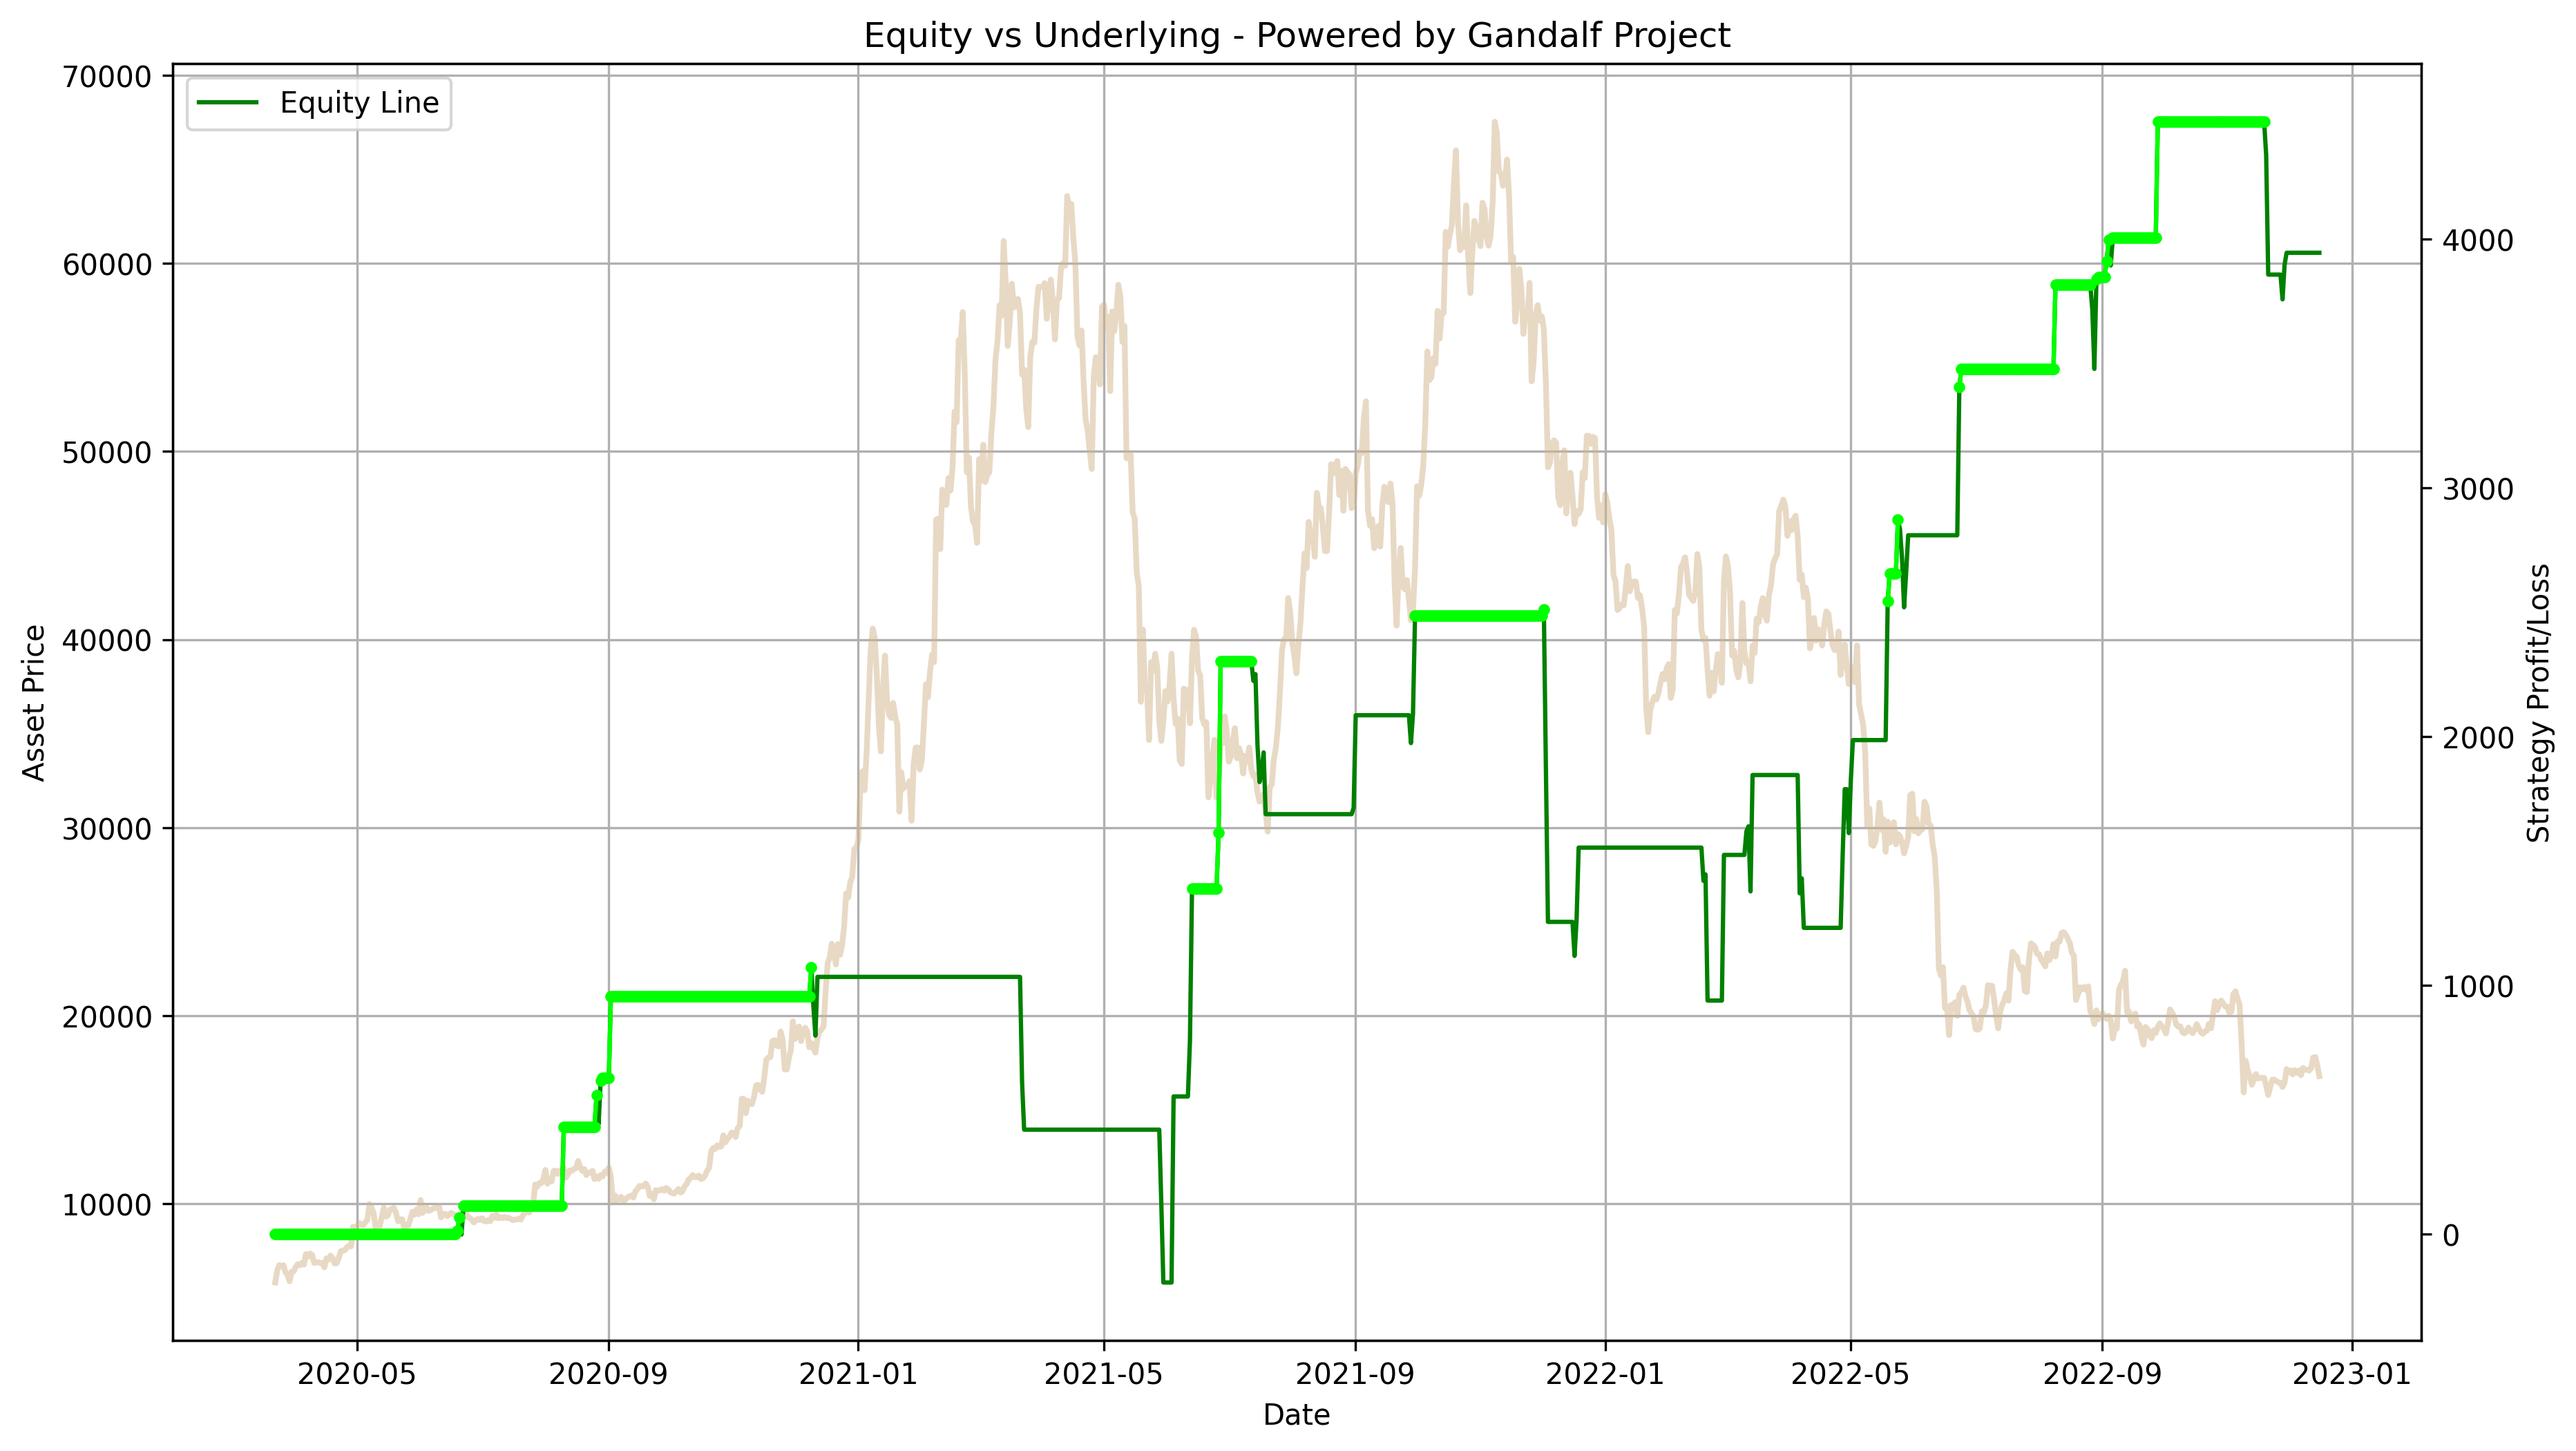

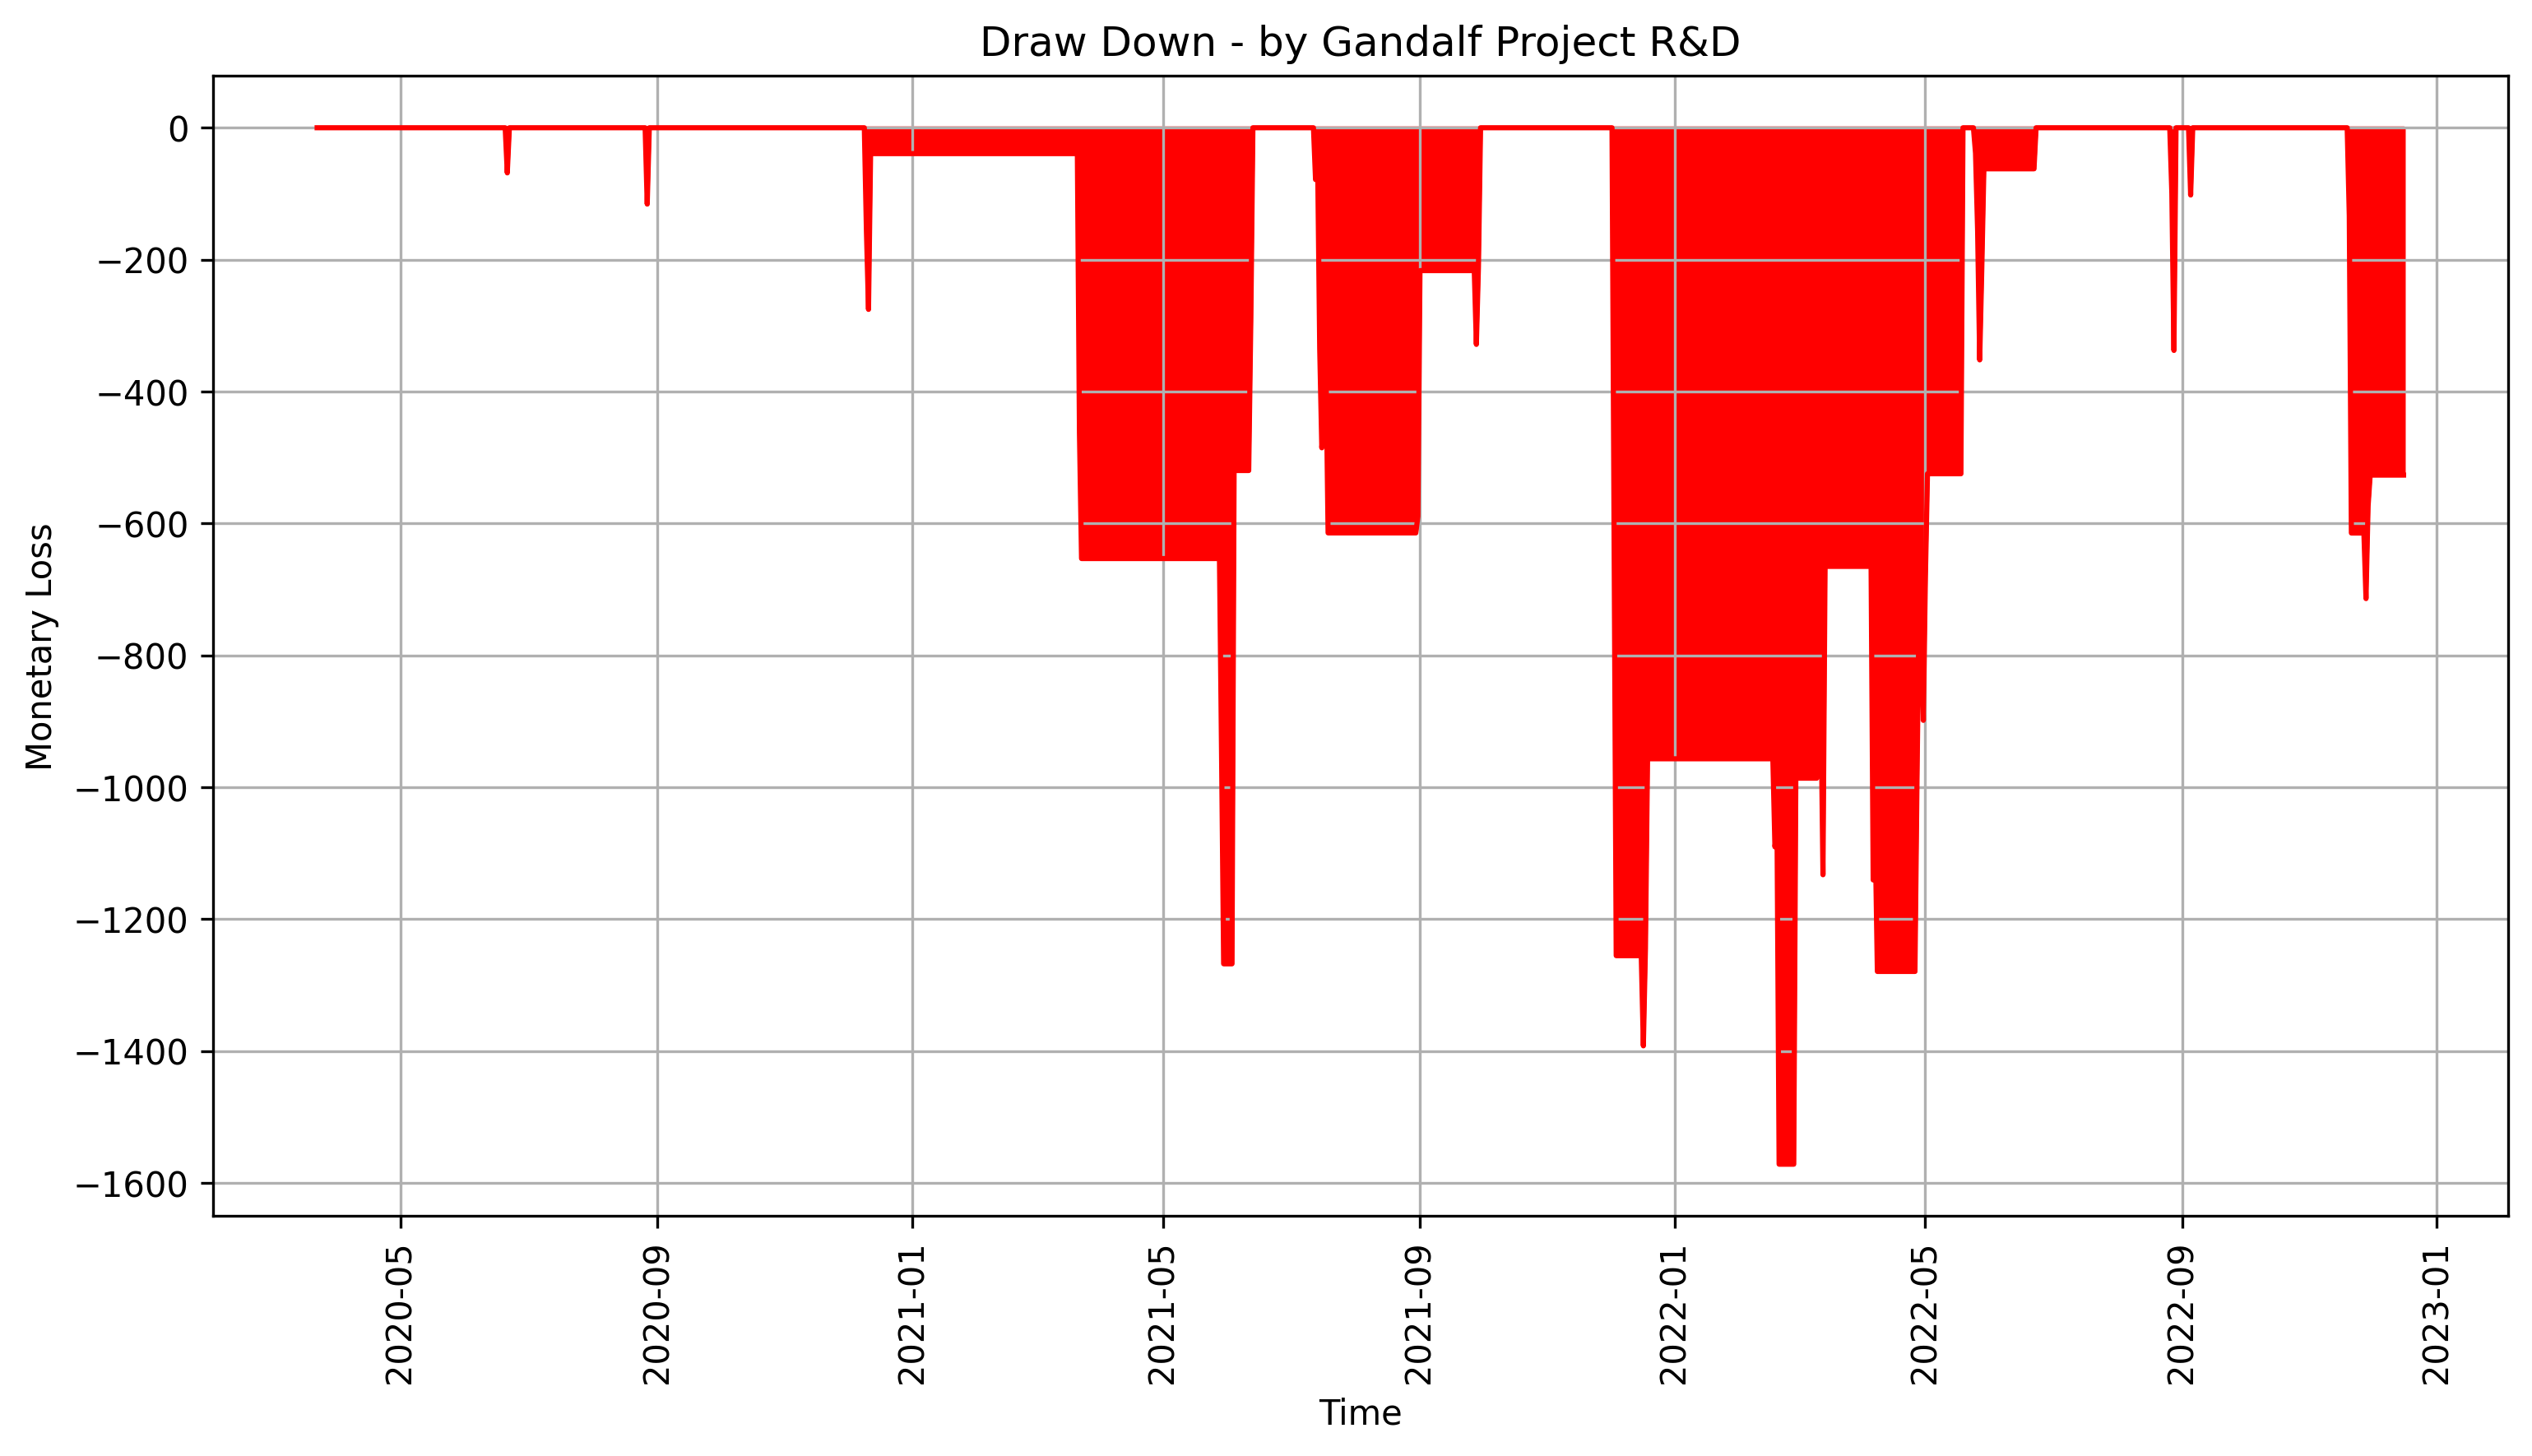

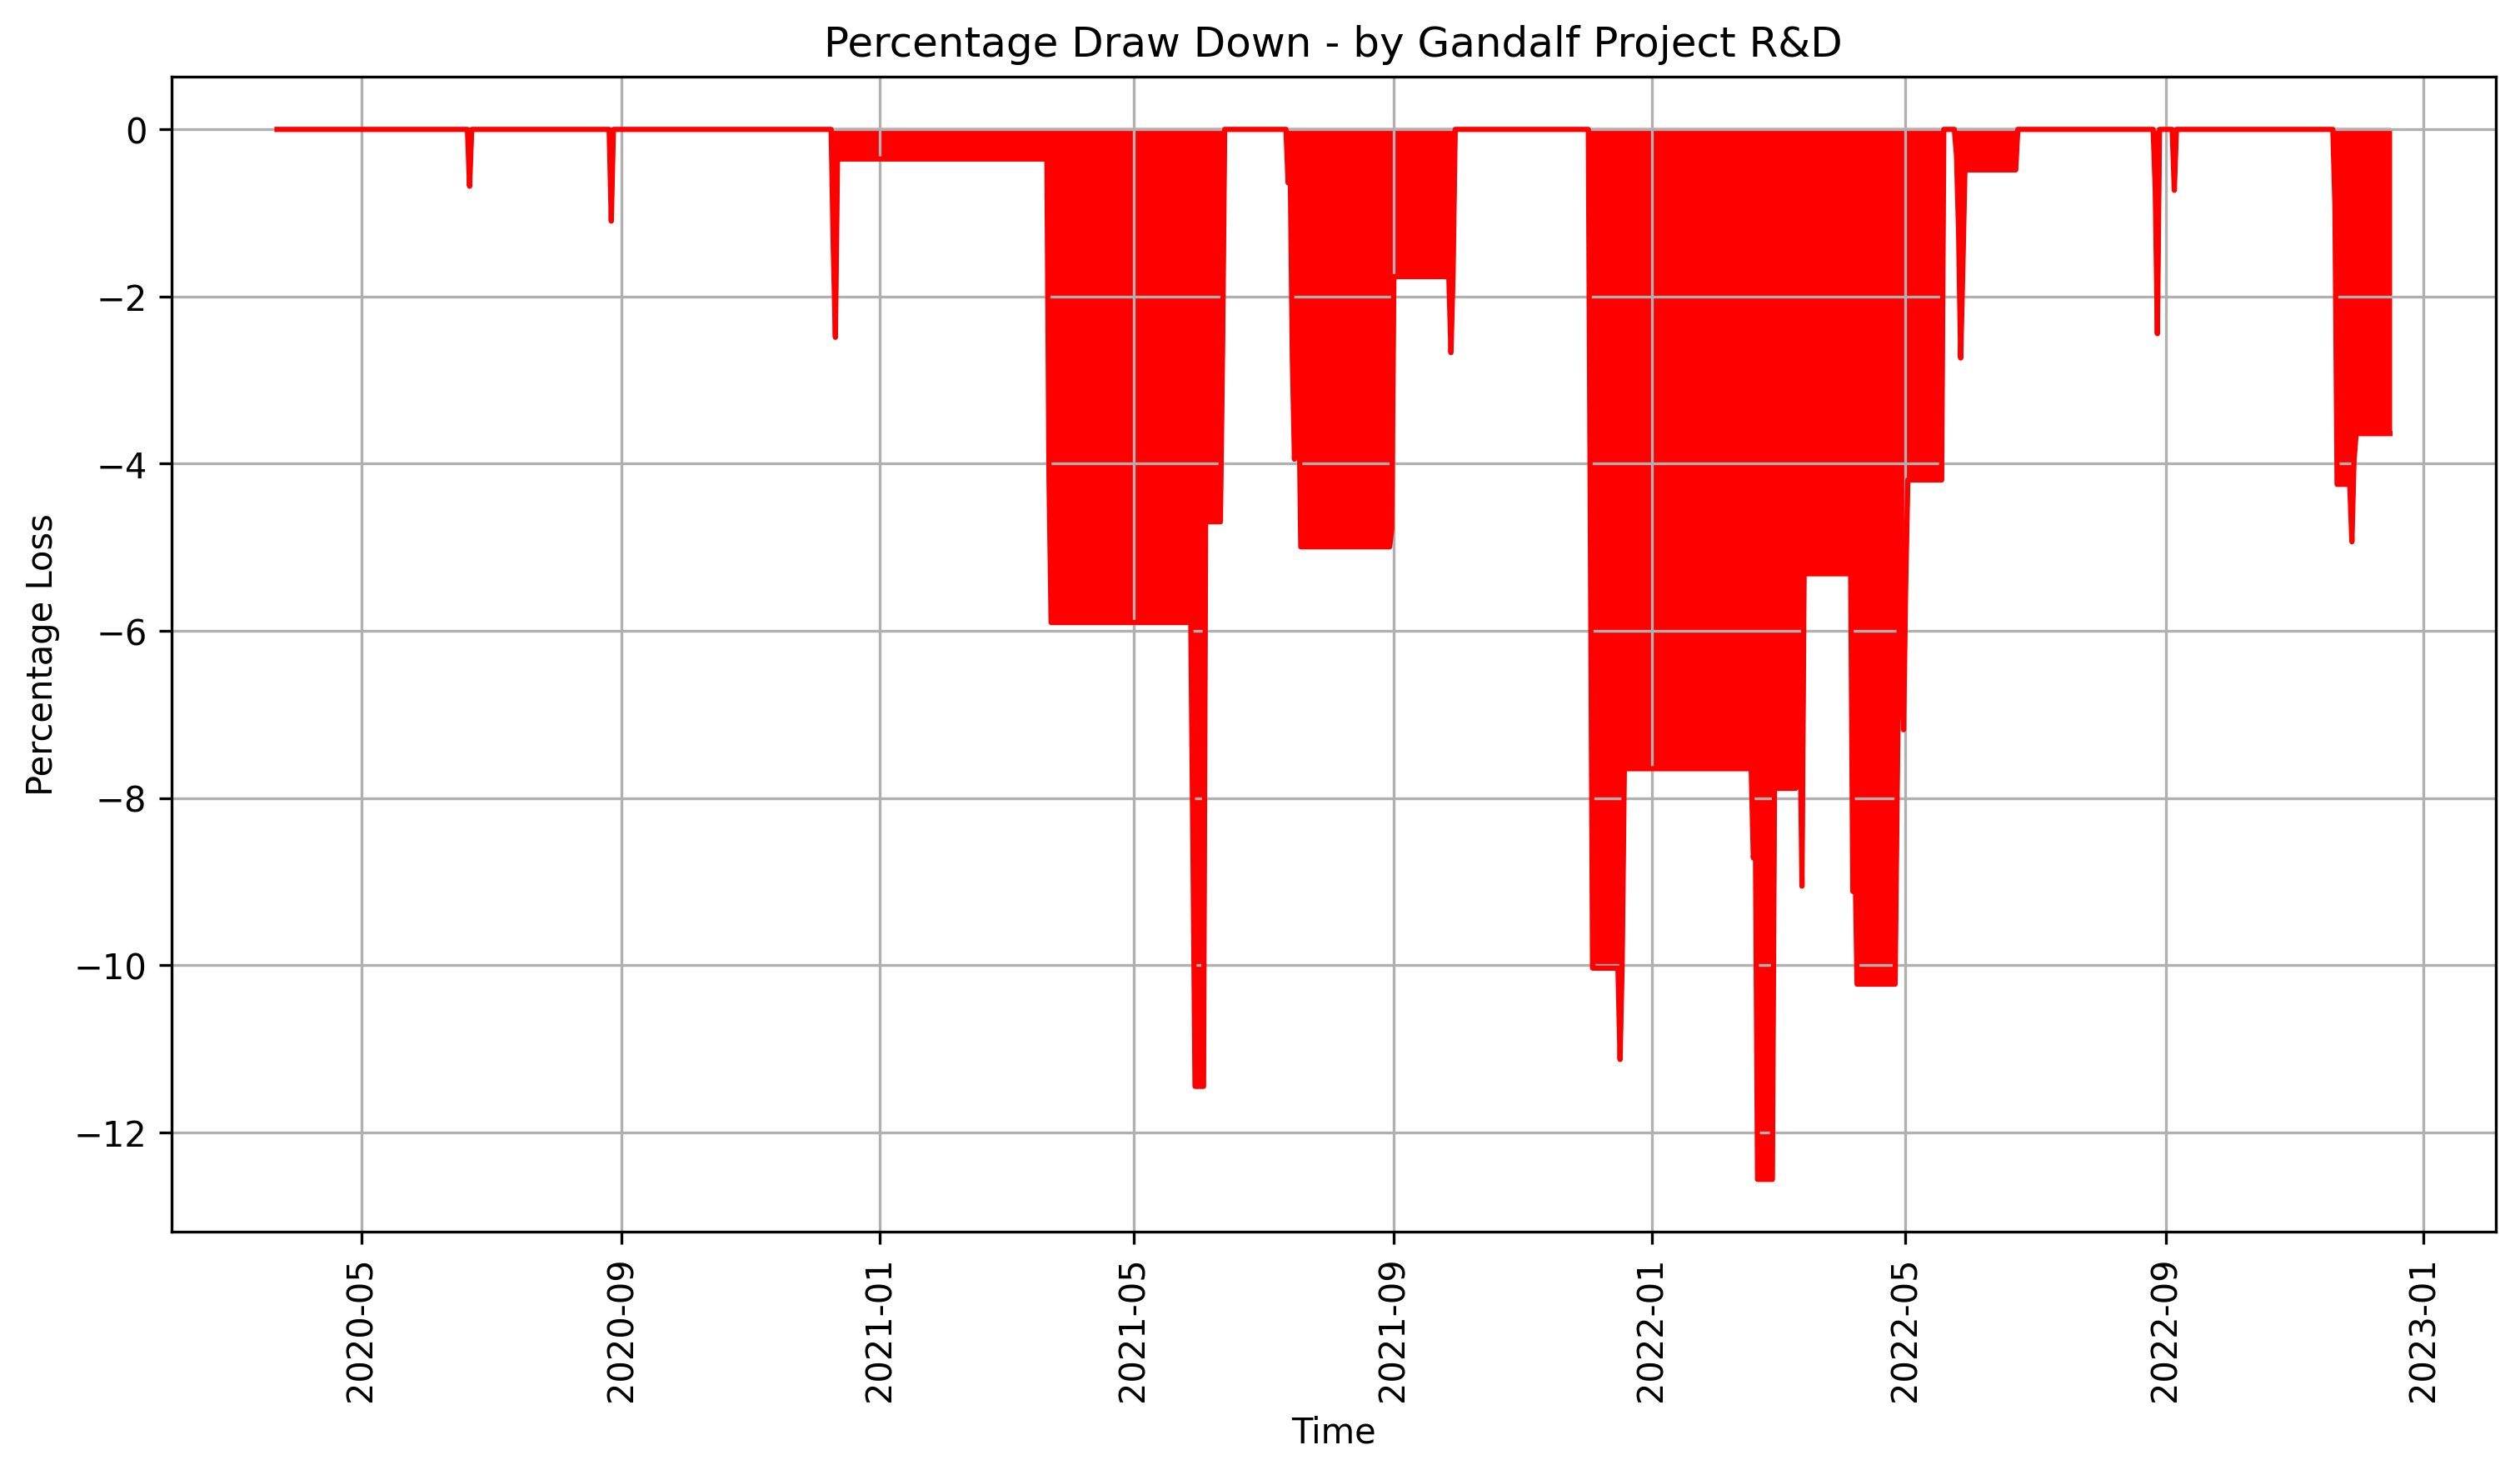

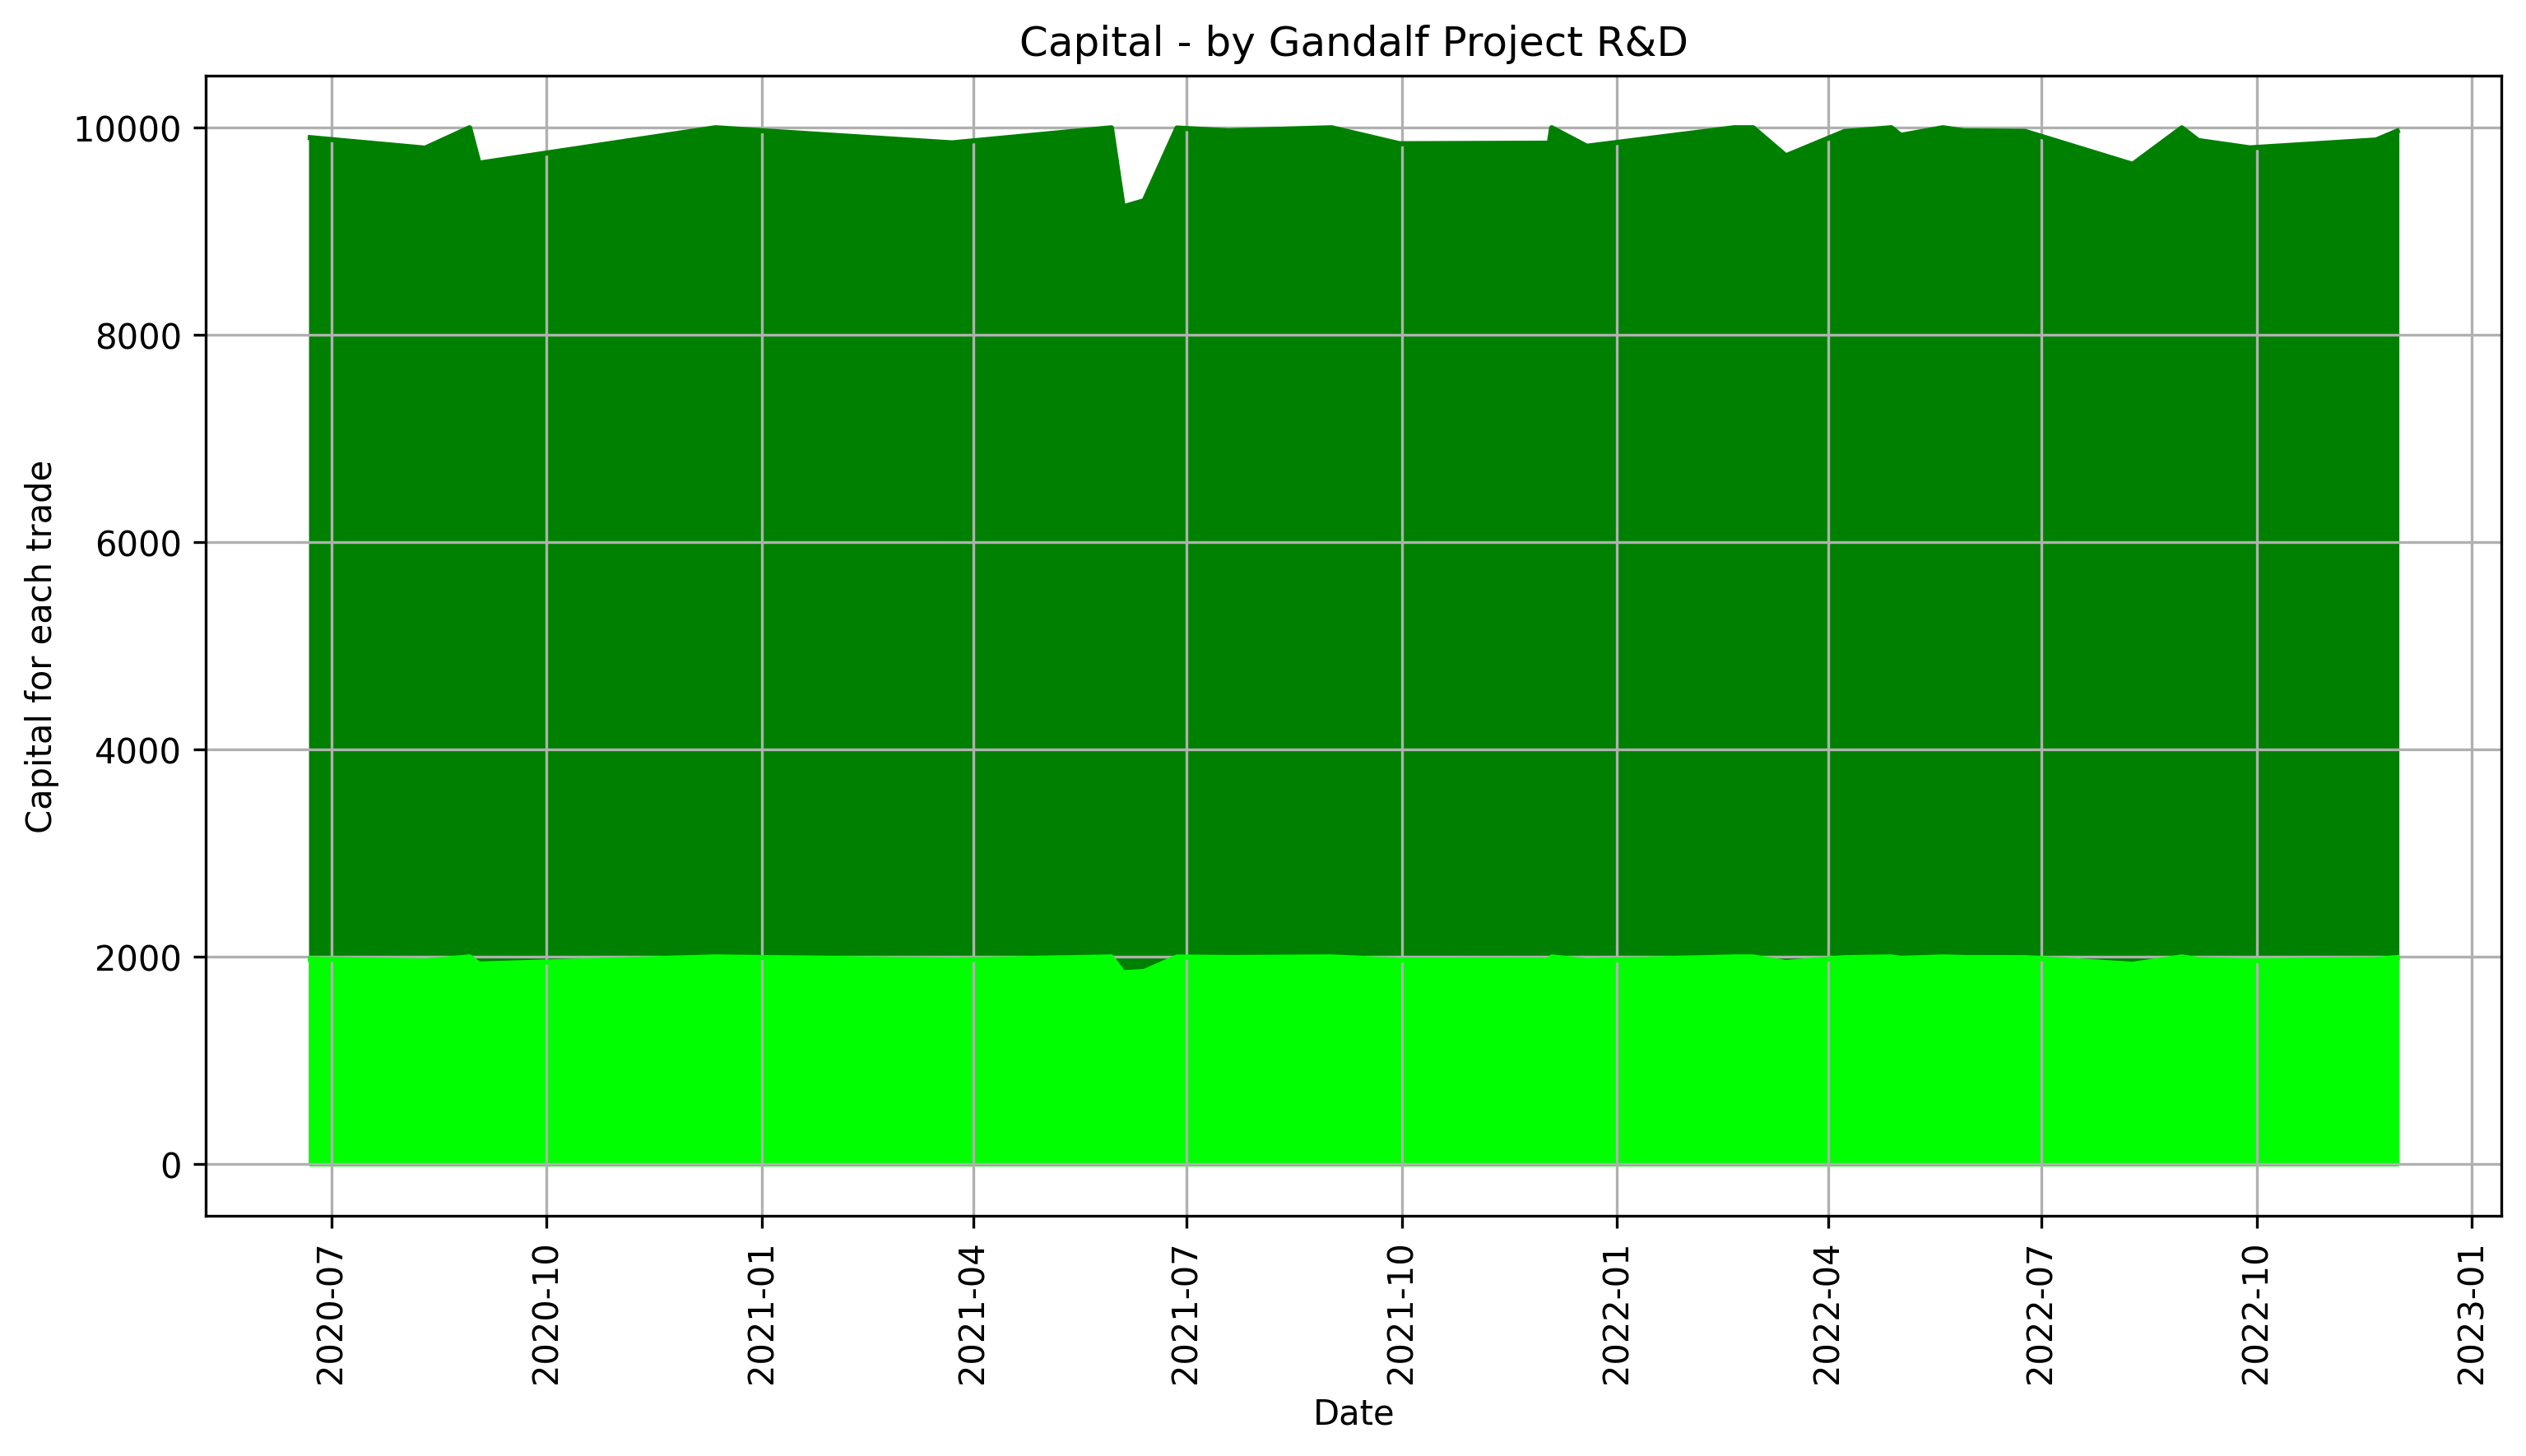

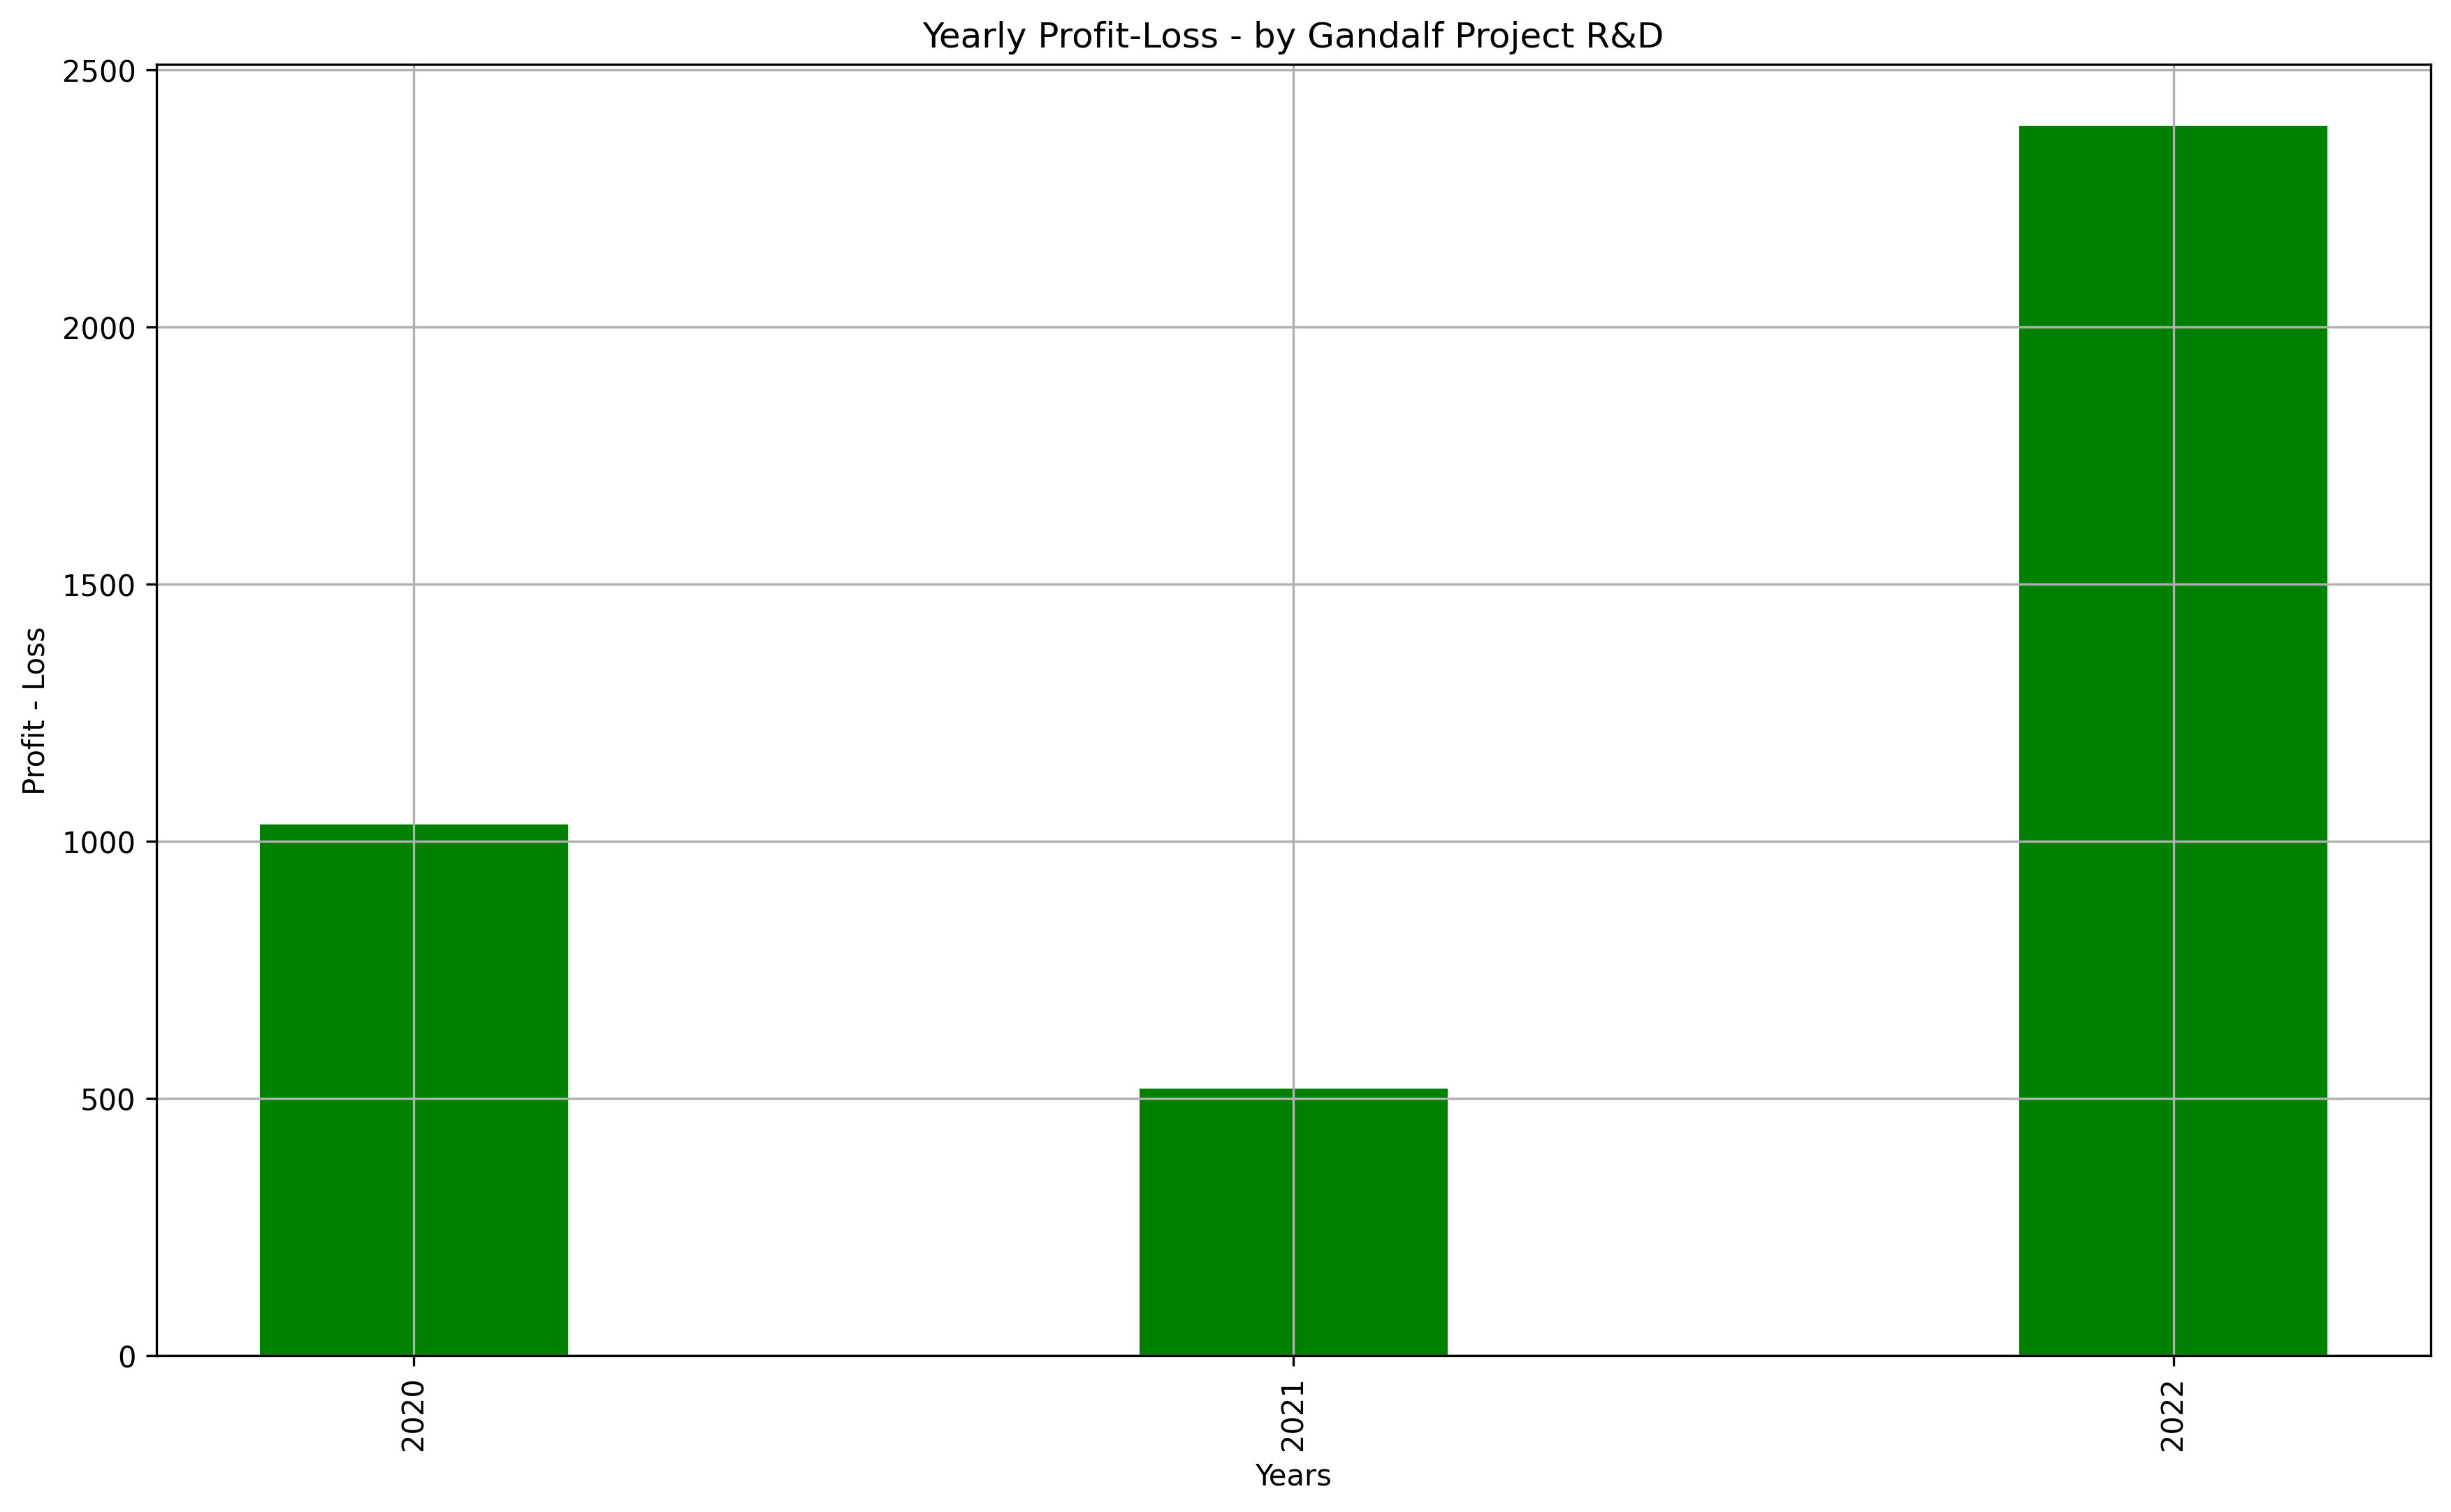

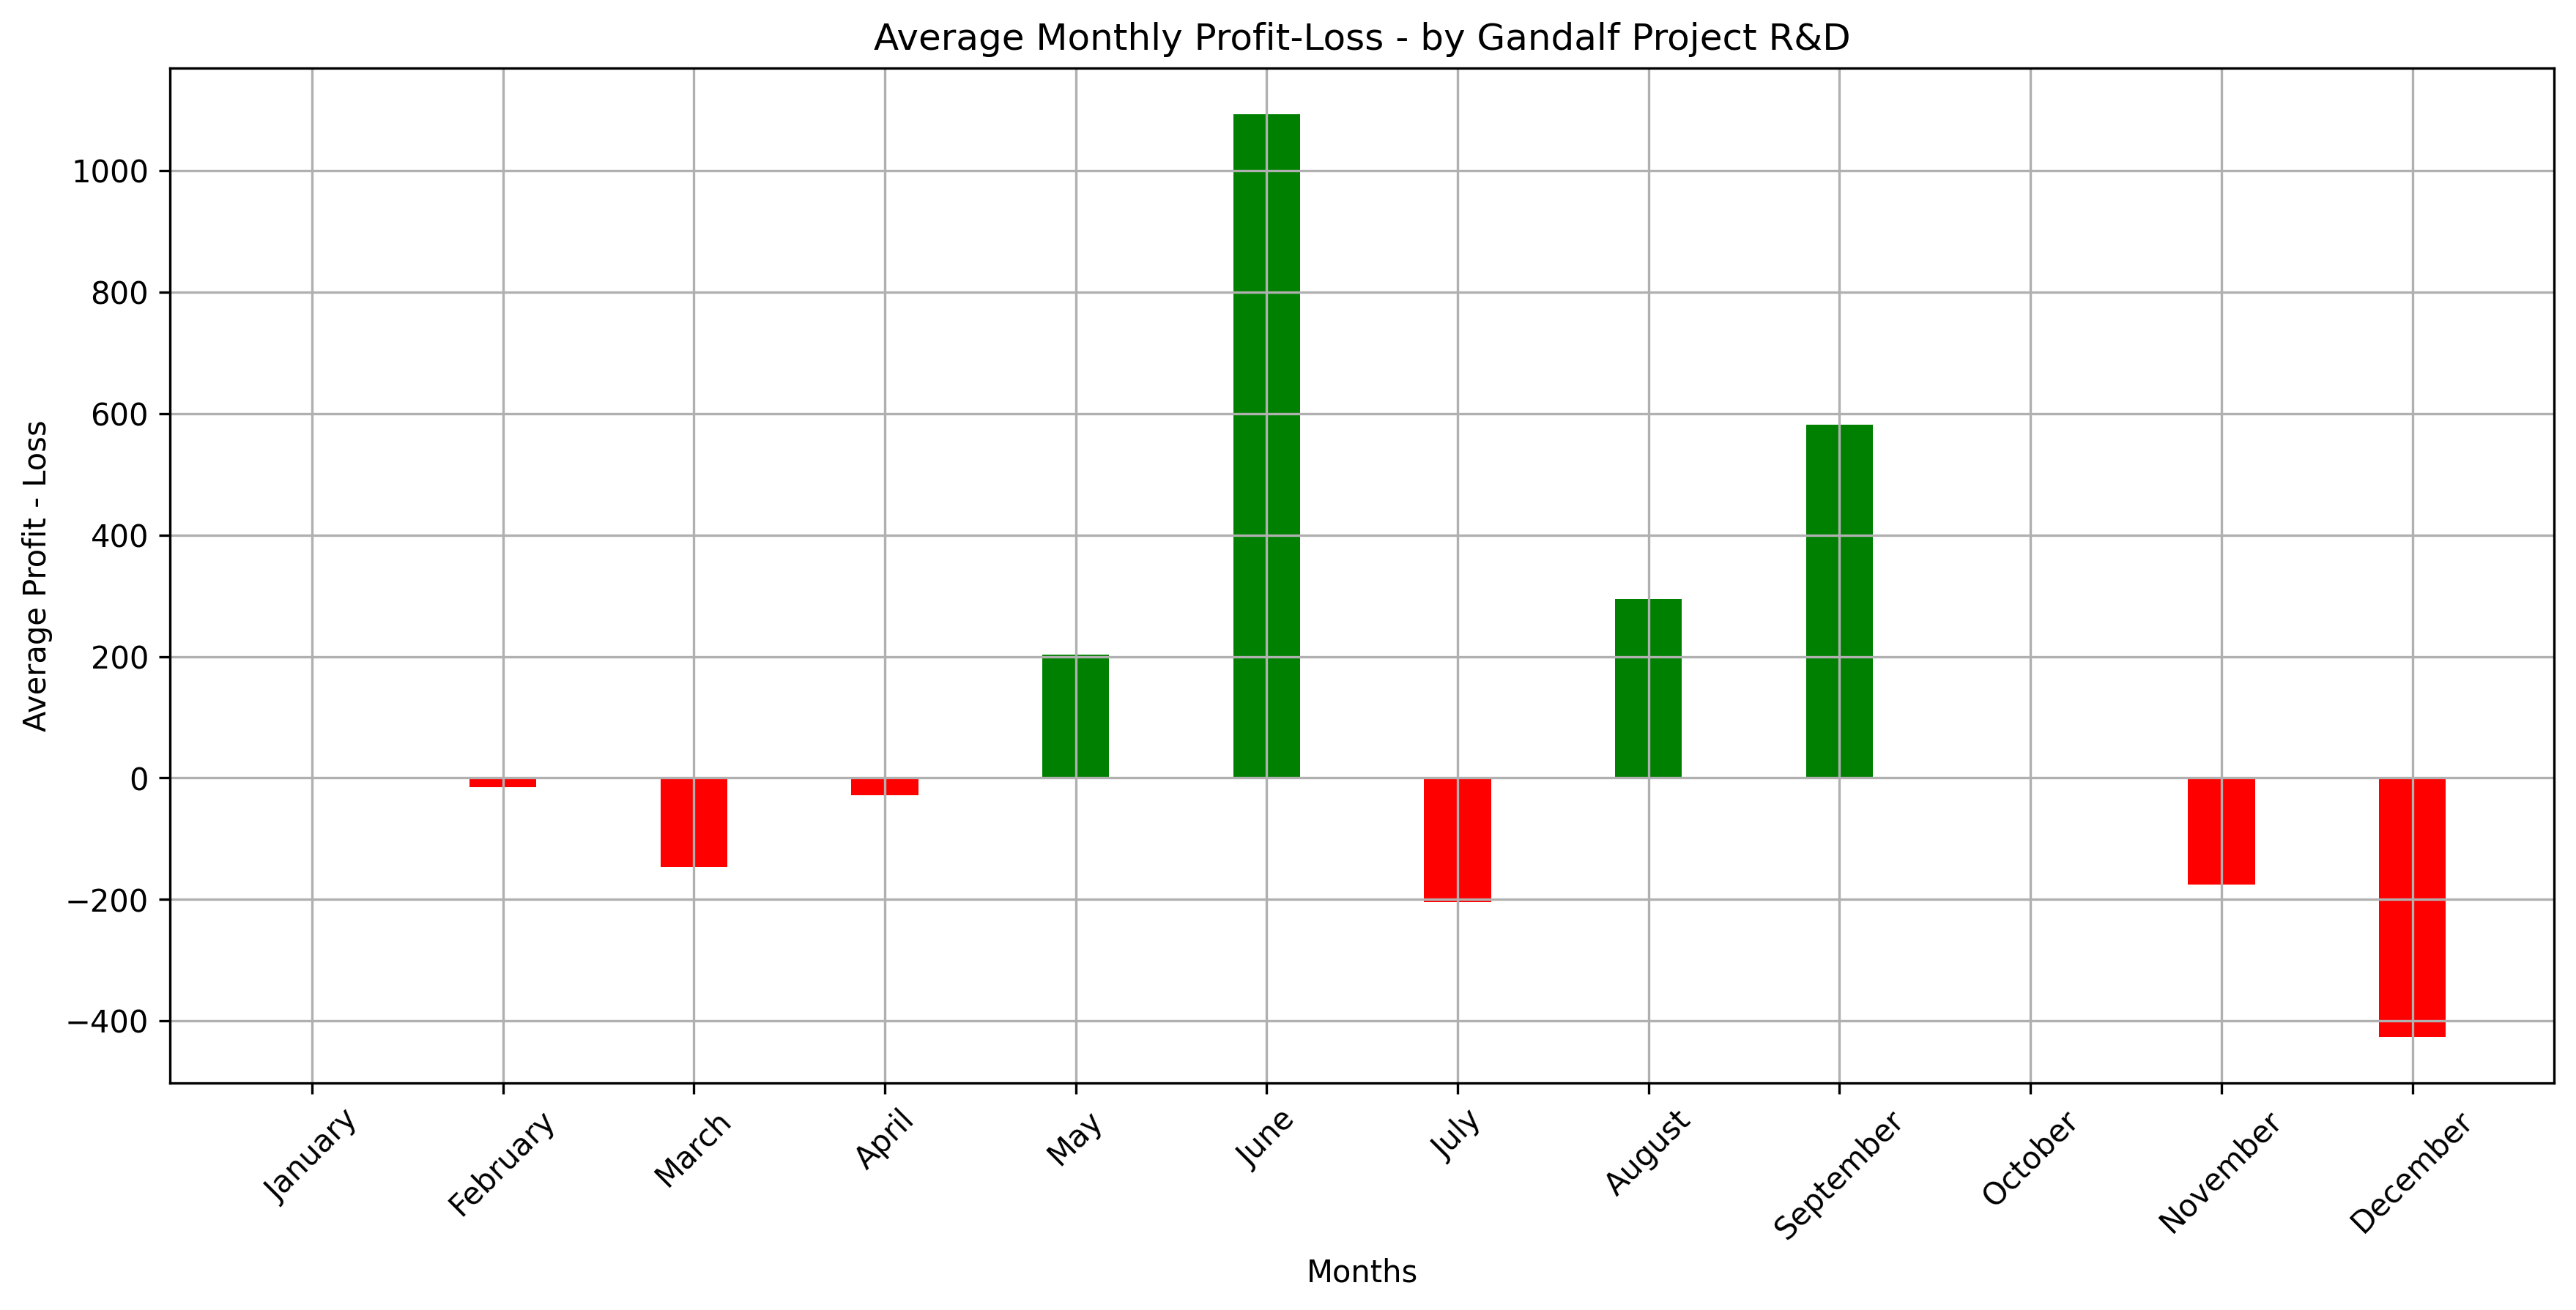

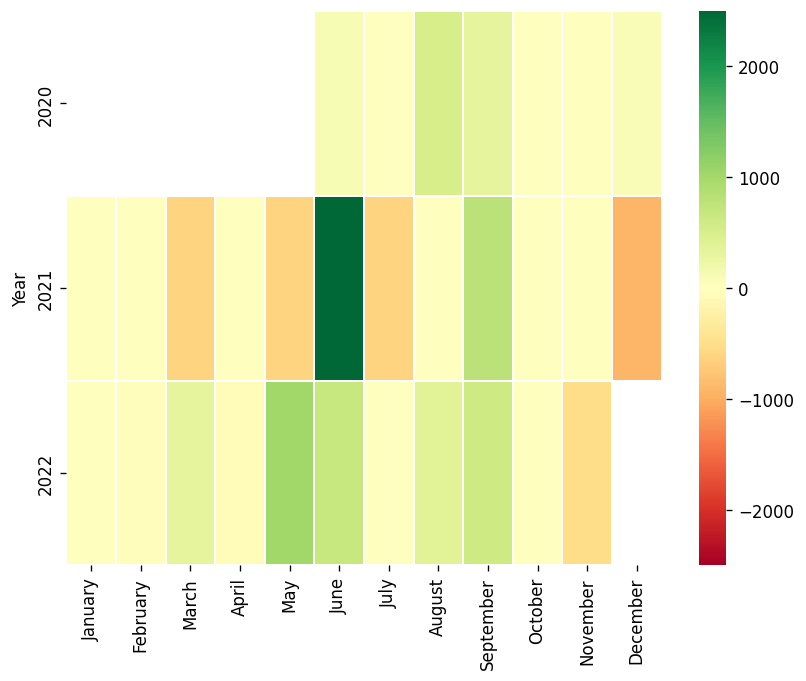

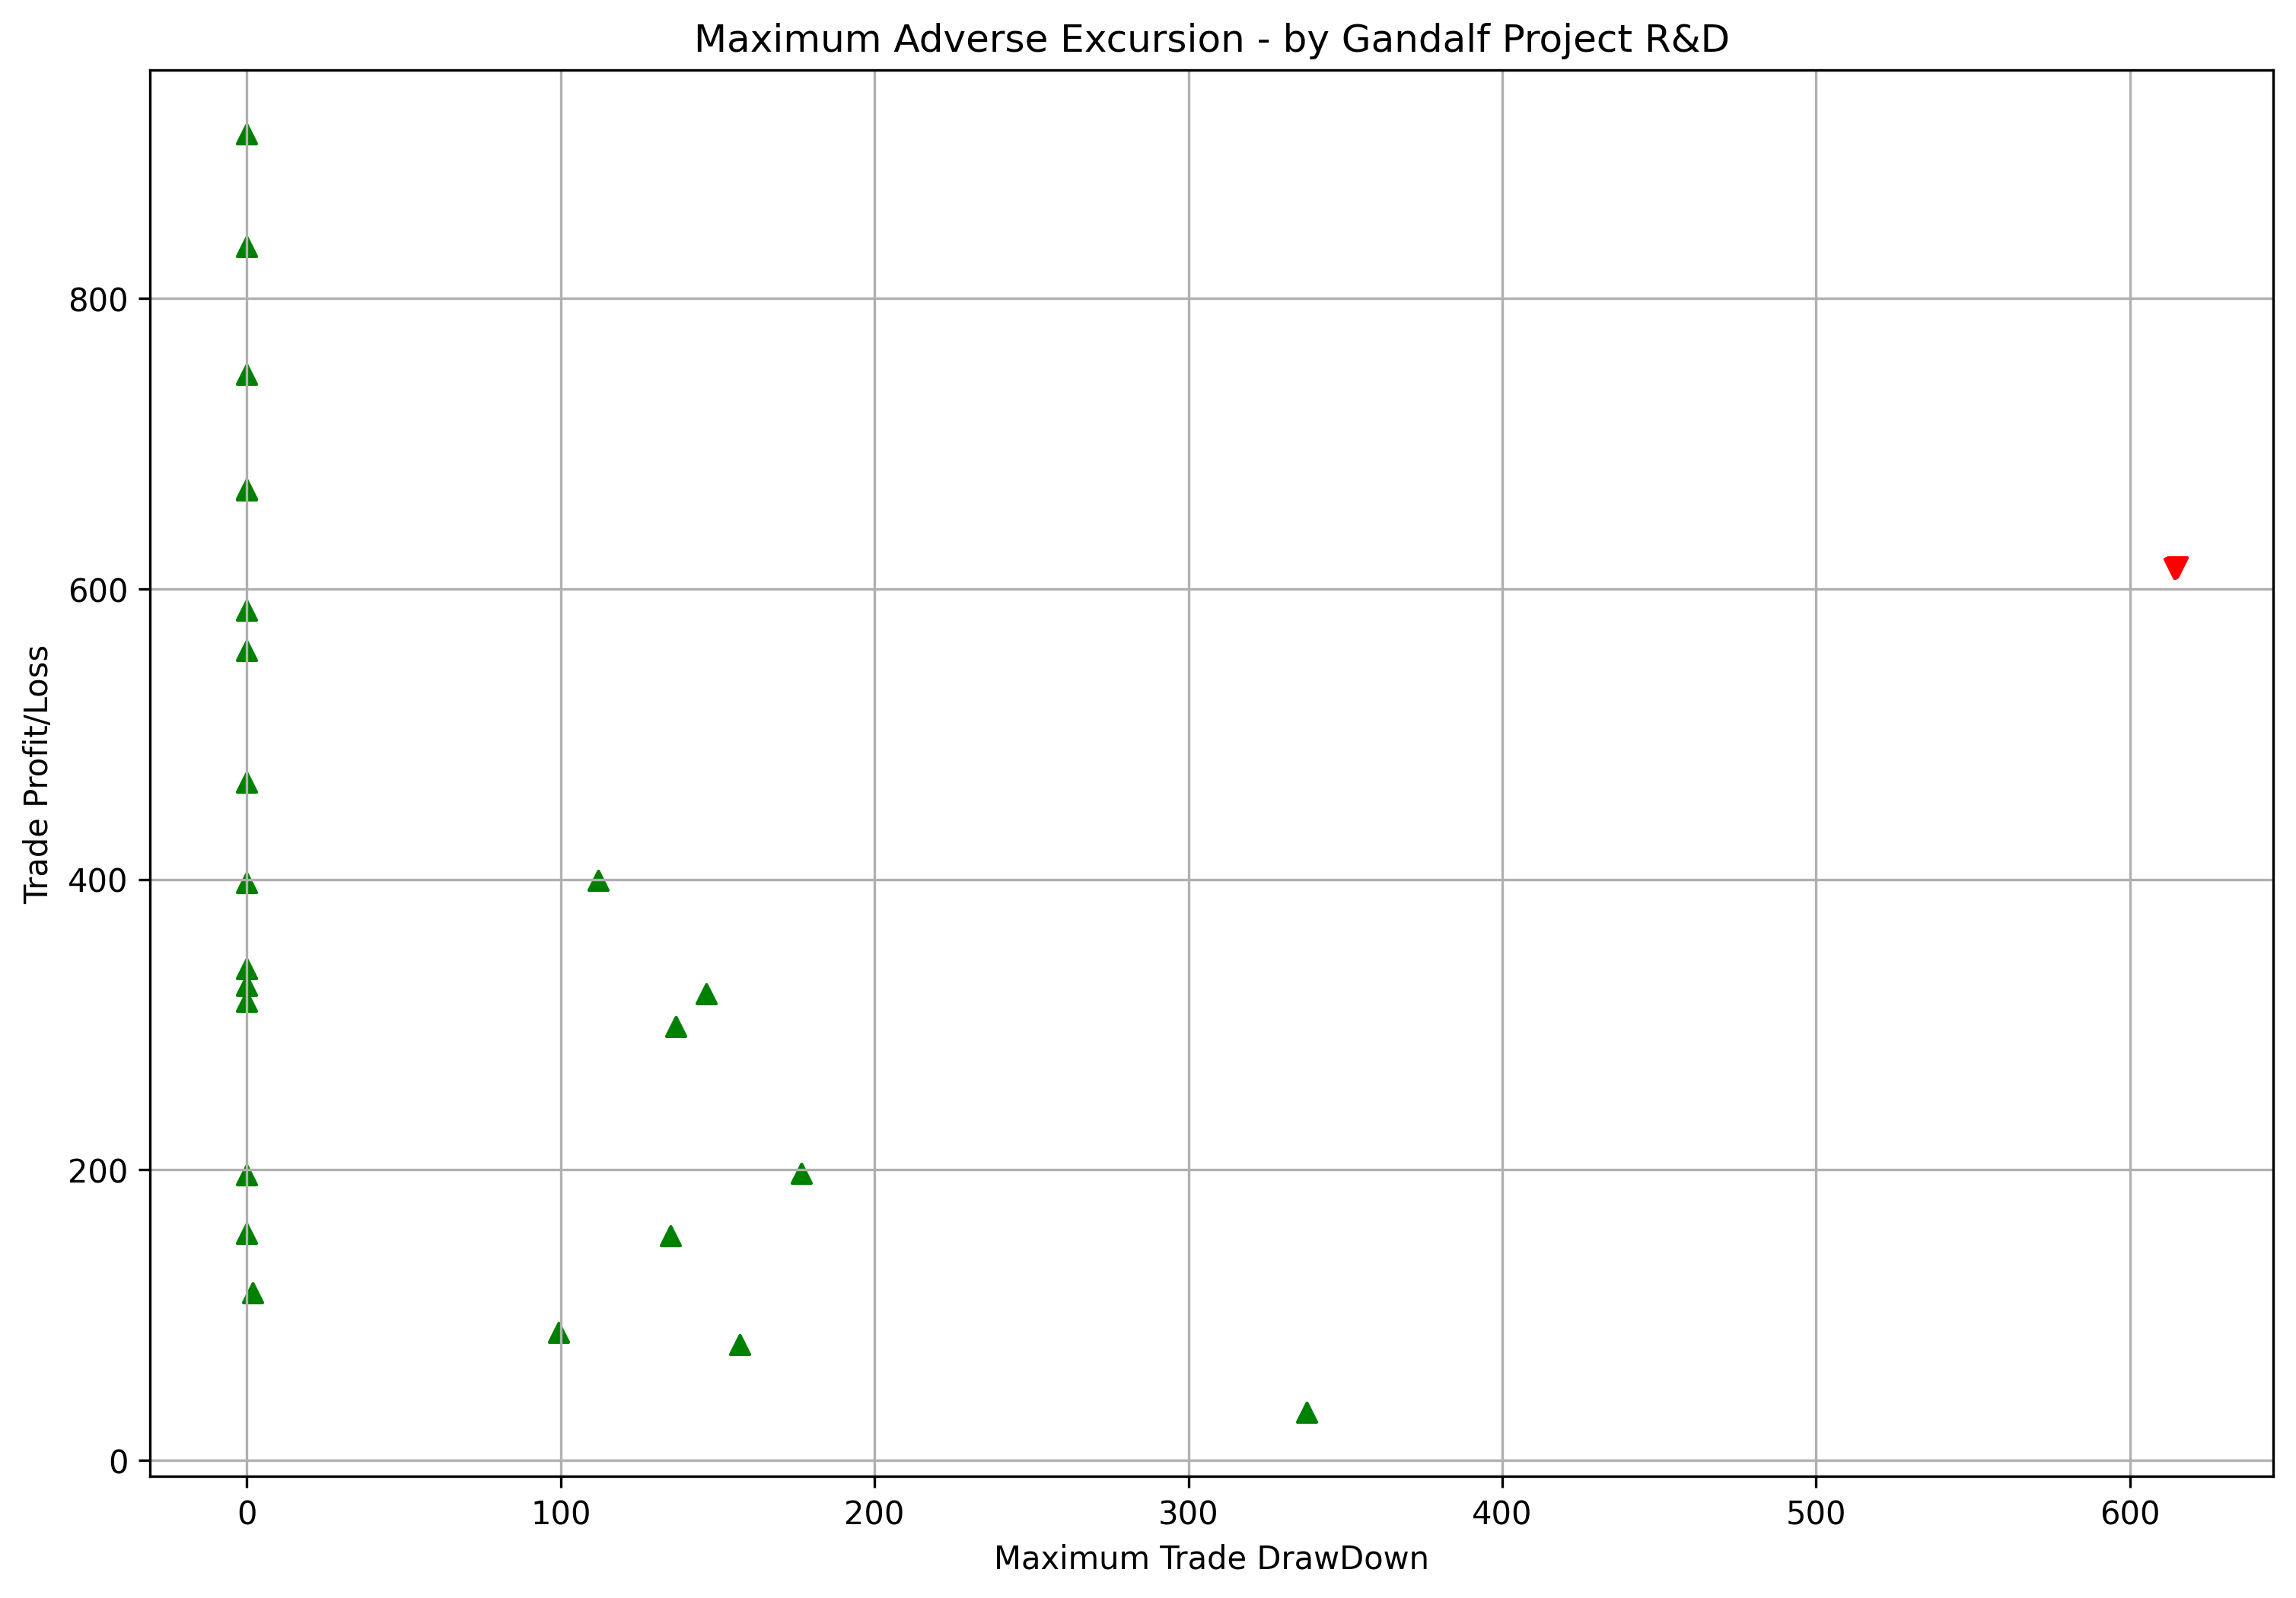

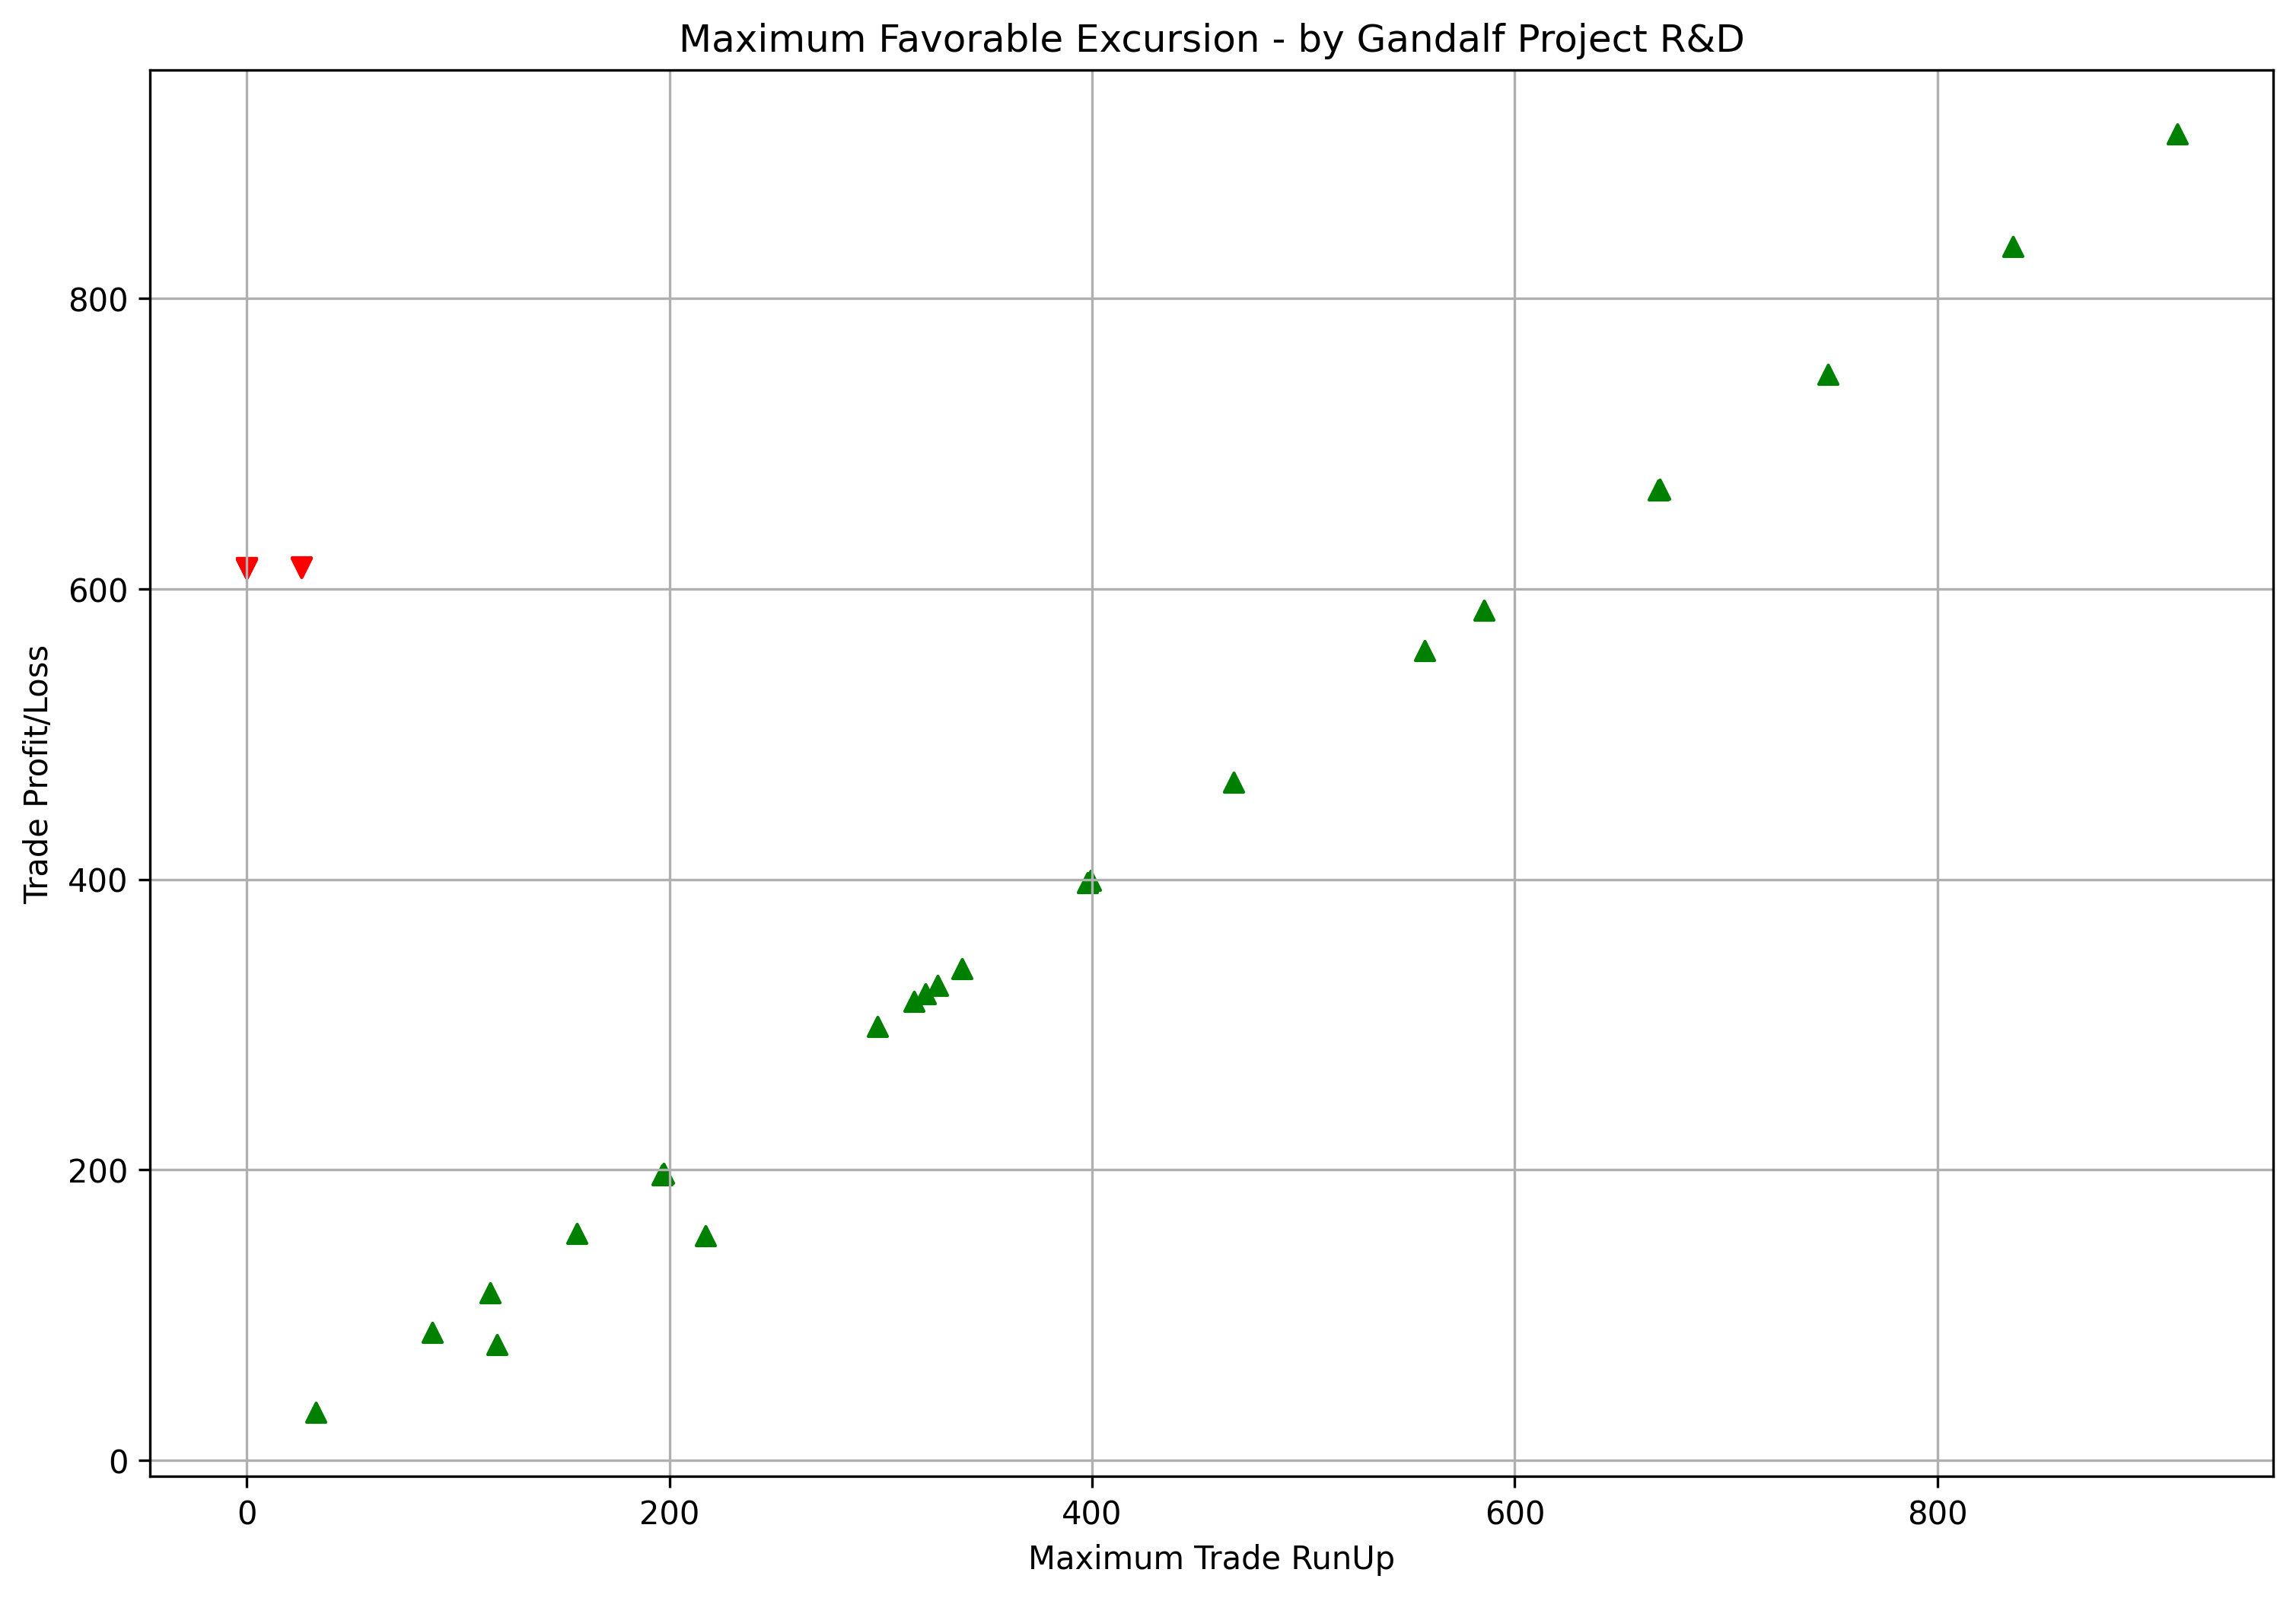

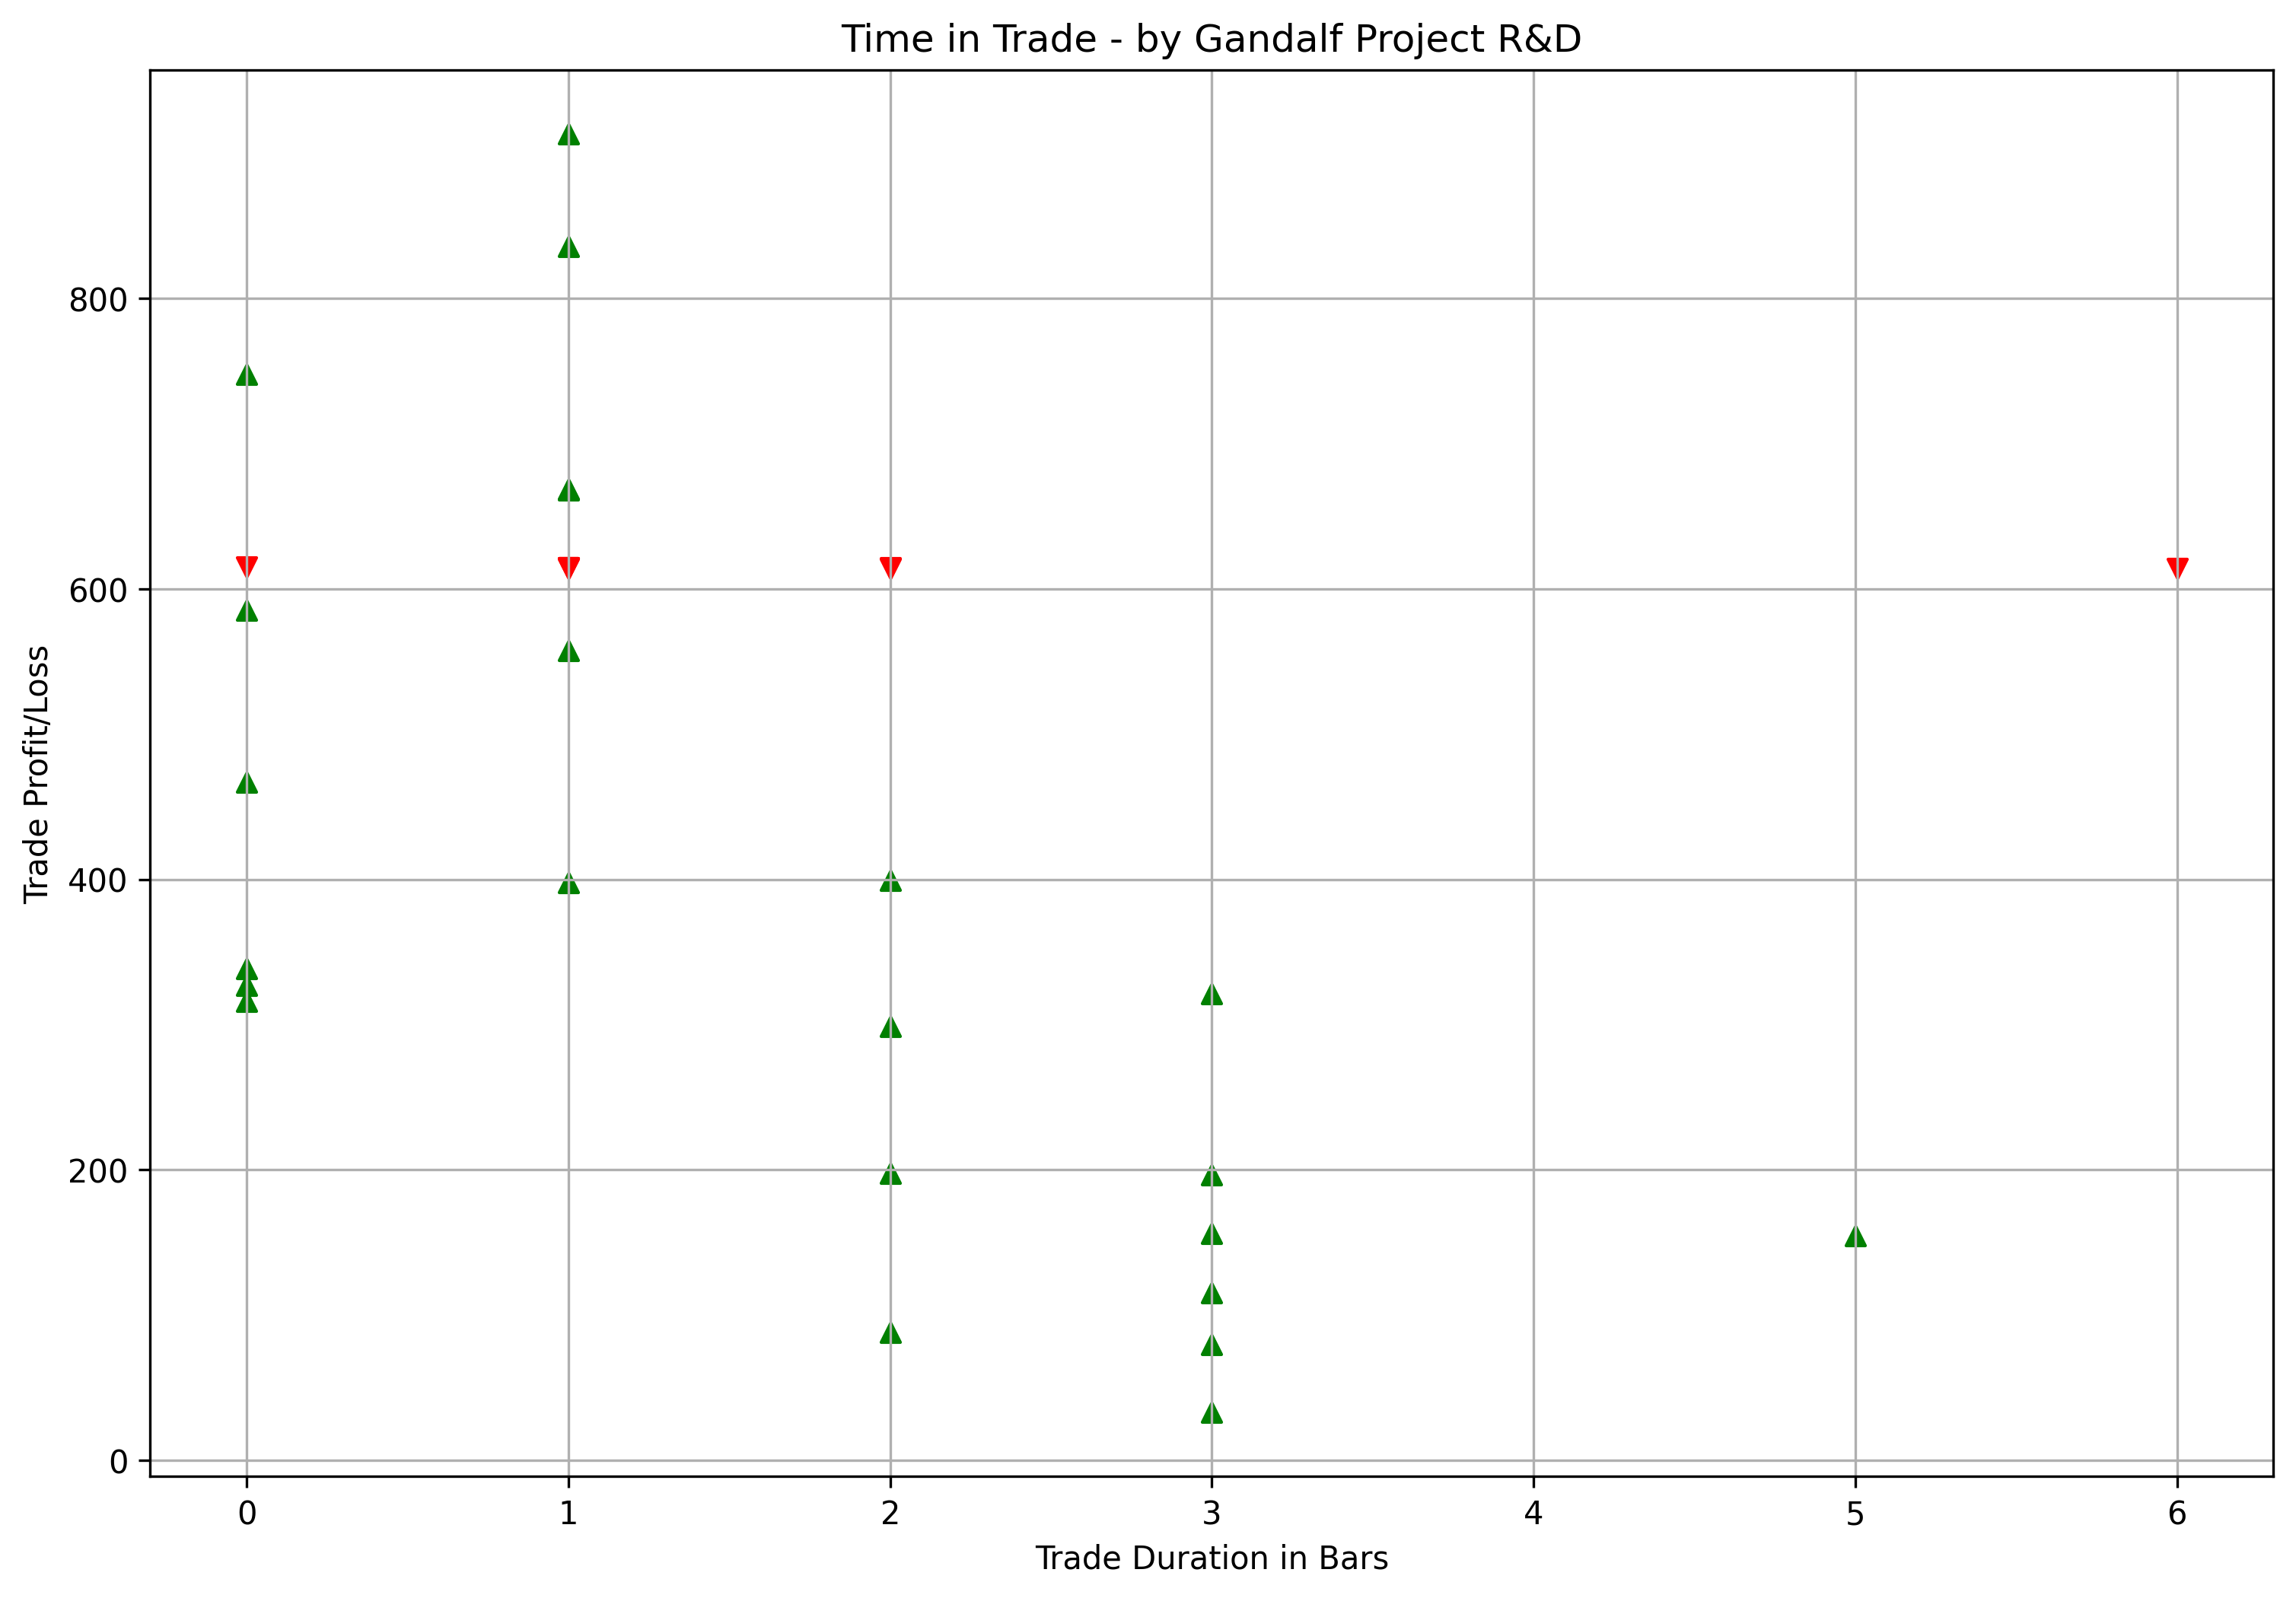

In [7]:
WRITELOG = False

NAME = "Btc_Williams_mean_lows_highs"
EXIT_ON_ENTRY_BAR = True
CONSECUTIVE_TRADES = True

COSTS_FIXED = 0
# 10 for 10 $ for each transaction (2 * fee each operation)
COSTS_VARIABLE = 0.075
# 1.0 for 1% (2 * fee each operation)
COSTS_PERSHARES = 0.0 
# 0.01 for 1 cent for each shares traded (2 * fee each operation)

INSTRUMENT = 3 # 1: equity, 2: future, 3: crypto/forex
TICK = 0.1
BIGPOINTVALUE = 1
DIRECTION = "long"
ORDER_TYPE = "limit"

QUANTITY = 10000
MARGIN_PERCENT = 20 # margin to use in capital calculation

MAX_INTRADAY_OPERATIONS = 1

TIME_EXIT = 0  # 0 to disable
TIME_EXIT_LOSS = 0  # 0 to disable
TIME_EXIT_GAIN = 0  # 0 to disable

MONEY_STOPLOSS = 600  # 0 to disable
MONEY_TARGET = 0  # 0 to disable

MIN_MONEY_PERCENT_STOPLOSS = 0
PERCENT_STOPLOSS = 0.0  # 0 to disable

MIN_MONEY_PERCENT_TARGET = 0
PERCENT_TARGET = 0  # 0 to disable


enter_level = df.low_media.shift(1)


rule_1 = (df.open > df.low_media.shift(1))
rule_2 = True

rule_3 = df.close.shift(1) > df.daily_close_sma.shift(1)

rule_4 = True #df.close.shift(1) >= df.daily_close_sma.shift(2)
rule_5 = df.daily_close_sma.shift(1) < df.daily_close_sma.shift(2)

enter_rules = rule_1 & rule_2 & rule_3 & rule_4 & rule_5


exit_rules = False

exit_rules_loss = False 

exit_rules_gain = False 


target_level = df.high_media.shift(1)


stop_level = False #df.close.rolling(std_mean).mean() - 10.0 * df.close.rolling(std_mean).std() 
#stop_level=0



tradelist, open_equity, closed_equity, operation_equity = apply_trading_system(df, INSTRUMENT, QUANTITY, MARGIN_PERCENT, BIGPOINTVALUE, TICK, DIRECTION,
                                                                               COSTS_FIXED, COSTS_VARIABLE, COSTS_PERSHARES, 
                                                                               ORDER_TYPE, enter_level, enter_rules, MAX_INTRADAY_OPERATIONS, 
                                                                               exit_rules, exit_rules_loss, exit_rules_gain,
                                                                               target_level, stop_level,
                                                                               TIME_EXIT, TIME_EXIT_LOSS, TIME_EXIT_GAIN, 
                                                                               MONEY_STOPLOSS, MONEY_TARGET, 
                                                                               PERCENT_STOPLOSS, MIN_MONEY_PERCENT_STOPLOSS, 
                                                                               PERCENT_TARGET, MIN_MONEY_PERCENT_TARGET, WRITELOG, EXIT_ON_ENTRY_BAR, CONSECUTIVE_TRADES)

# True: Interactive, False: Static
performance_report(df, tradelist, closed_equity, open_equity, 10000, 0, MARGIN_PERCENT, False)


In [8]:
tradelist

,id,entry_date,entry_label,quantity,entry_price,exit_date,exit_label,exit_price,bars_in_trade,mae,mfe,operations,capital,costs
2020-06-22 02:00:00,1,2020-06-19 02:00:00,entry_long_limit,1.065380,9296.50,2020-06-22 02:00:00,target_level_long,9418.433333,3.0,-1.93,115.05,115.05,9904.307545,-14.853569
2020-08-10 02:00:00,2,2020-08-10 02:00:00,entry_long_limit,0.856041,11451.90,2020-08-10 02:00:00,target_level_entrybar_long,11838.440000,0.0,0.00,315.89,315.89,9803.298841,-15.000000
2020-08-29 02:00:00,3,2020-08-26 02:00:00,entry_long_limit,0.883516,11318.42,2020-08-29 02:00:00,target_level_long,11558.056667,3.0,0.00,196.45,196.45,10000.000000,-15.276306
2020-09-02 02:00:00,4,2020-09-02 02:00:00,entry_long_limit,0.838788,11514.30,2020-09-02 02:00:00,target_level_entrybar_long,11921.970000,0.0,0.00,326.95,326.95,9658.051480,-15.000000
2020-12-12 01:00:00,5,2020-12-09 01:00:00,entry_long_limit,0.545729,18324.11,2020-12-12 01:00:00,target_level_long,18496.540000,3.0,-156.94,118.52,79.34,10000.000000,-14.764589
2021-03-23 01:00:00,6,2021-03-22 01:00:00,entry_long_limit,0.174363,56513.60,2021-03-23 01:00:00,money_stoploss_long,53072.510000,1.0,-614.15,0.00,-614.15,9853.890635,-14.145191
2021-05-30 02:00:00,7,2021-05-29 02:00:00,entry_long_limit,0.280399,35661.79,2021-05-30 02:00:00,money_stoploss_long,33521.980000,1.0,-614.55,0.00,-614.55,9999.523322,-14.554864
2021-06-04 02:00:00,8,2021-06-04 02:00:00,entry_long_limit,0.254798,36252.00,2021-06-04 02:00:00,target_level_entrybar_long,39246.780000,0.0,0.00,748.06,748.06,9236.933772,-15.000000
2021-06-13 02:00:00,9,2021-06-12 02:00:00,entry_long_limit,0.267867,34705.10,2021-06-13 02:00:00,target_level_long,37878.343333,1.0,0.00,835.72,835.72,9296.345921,-14.282437
2021-06-27 02:00:00,10,2021-06-26 02:00:00,entry_long_limit,0.316611,31576.09,2021-06-27 02:00:00,target_level_long,34509.333333,1.0,0.00,913.37,913.37,9997.353128,-15.332062
